# Exploring variables influencing crime incidents in the context of multi-ethnic and migrant metropolitan

# 1 Introduction

Crime incidents are a global concern and crime-related variables are widely studied by institutions around the world(Cole and Gramajo, 2009). However, the crime-related variables will not show the same trend in the study area. Generally, there would be a correlation between crime and group. Studies reported a significant and positive relationship between ethnic diversity and criminal incidence in the United State(Cole and Gramajo, 2009). But it is worth mentioning that in the Netherlands, groups of diverse regions commit less crime than native Dutch areas (Unnever, 2019). Besides, Individual education levels also impact crime rates, but different gender in education levels could have a positive or negative effect on crime rates (Cole and Gramajo, 2009). On the other hand,  Community changes can also affect the occurrence of crime (Sampson et al., 1997). A model has been shown that residents have their preference for the similarity of neighbours (Campbell et al., 2014). Finally different indicators including immigration and socio-economic status of the area may lead to the concentration of crime in particular neighbourhoods or settings (Wang et al., 2019).

The number of crimes, especially burglaries has been decreasing every year since the 1990s in Canada. (Andresen and Hodgkinson, 2018)，However, crime rates in Vancouver are still generally higher than expected on the basis of population size(Andresen, 2006).

Due to the rapid growth of downtown Vancouver in the past, the city has attracted people from different places such as Europe and Asia to settle. Immigration communities began to develop in the years and change the culture of some areas and communities of the century(Hiebert, 2009). Apart from this, considering Vancouver's policies on community mobility and resource allocation in its unique geographic location, people of different ethnicities and with different incomes tend to be concentrated in separate communities in recent decades. Therefore, the distribution of different groups in various geographically and economically(Andresen and Hodgkinson, 2018). Indicators such as immigration, mobility and ethnic heterogeneity may play an important role in the stability of the area in the city of Vancouver. 


# 2 Research question

**Which indicators would significantly impact the crime rate in the city of Vancouver in the context of migrant city?**
- What kind of regression models would better explain the occurrence of crime in Vancouver?
- Which indicators the model showed would have a significant impact on crime in Vancouver?
- Which areas need more attention from public security perspective based on the significant indicators?

# 3 Data

## 3.1 Description of data

Crime statistical data and census data for 2011 and 2016 were selected for the research based on the situation in Vancouver. Since small-scale research is needed to study the distribution of ethnic and immigrant communities in the city of Vancouver, Census Tracts (CT), about 105CT in the city of Vancouver, were used as the study scale to analyze in the research. 

The description of selected data could be shown as below:

| Indicator              | Characteristic                    | Description                                            |
|------------------------|-----------------------------------|--------------------------------------------------------|
| Crime incidents        |                                   |                                                        |
| Population             | Population                        |                                                        |
|                        | population density                |                                                        |
| Area                   | Land area                         |                                                        |
| Education              | High certificate                  | University certificate or diploma above bachelor level |
| Income                 | Median income                     | Median after-tax income among recipients               |
|                        | Low income                        | Low income based on the Low-income cut-offs, after tax |
| Mobility and Immigrant | Movers in 1 year                  | Movers from other areas whithin 1 year                 |
|                        | Immigrant in 10 years             | Immigrant from other regions within 10 years           |
| Ethnicity              | African origins                   |                                                        |
|                        | Asian origins                     |                                                        |
|                        | Caribbean origins                 |                                                        |
|                        | European origins                  |                                                        |
|                        | Latin origins                     |                                                        |
|                        | North American Aboriginal origins |                                                        |
|                        | Oceania origins                   |                                                        |
|                        | Other North American origins      |                                                        |
|                        | Ethnic Heterogeneity              | *H(X), calculation from the density of each ethnic groups           |
| Year                   | Year                              |                                                        |

### 3.1.1 Census data

Census profile collected from [Vancouver open data catalogue](https://www12.statcan.gc.ca/census-recensement/index-eng.cfm) provides statistical information including population, income, and education from the individual component as well as ethnicity, immigration and mobility information from the community component. Due to a large number of indicators in the census profile, all indicators would be filtered in the study.

**Please note:**  Ethnic Heterogeneity: $ H(X)=-\sum_{i=1}^{n} P_{i} \log P_{i} $

H(X) is the Ethnic Heterogeneity, P(i) is the density of ethnic group i.

### 3.1.2 Crime data

Crime incident data comes from [Vancouver police department](https://geodash.vpd.ca/opendata/#), which contains the geographical location, classification and dates of crime incidents. In order to match the census data, Crime incidents would be aggregated in CT. Besides, the study would count offences against a person and property excluding vehicles from all crime classification to ensure the crime incidents were generated because of the public. 

## 3.2 Presentation of data

The study would import geopandas, pandas, numpy to describe and clean the data. sklearn was used to build the regression and clustering model in the following steps. Besides, matplotlib and seaborn could be used in visualize the result.

In [1]:
#package for data processing
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#package for rusult visualization
import matplotlib.cm as cm
import seaborn as sns
import pyproj

#package for regression and clustering
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

import sklearn
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import lasso_path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans


# settings for environment
pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.4f}'.format 
plt.style.use('ggplot') 

# from itertools import cycle


The raw data could be shown below:
- 2011 census profile for CT statistical information in BC province(csv)
- 2011 census profile for National Household Survey (NHS) in BC province(csv)
- 2016 census profile statistics by CT (csv) in Vancouver metropolian area(csv)
- 2011 and 2016 Crime incidents data in city of Vancouver (csv)
- Census tracts area in city of Vancouver (geojson)

The preprocessing of the data should be 
- Import data
- Aggregate, clean and filter census profile data in 2011 
- Clean and filter census profile data in 2016
- Count selected crime data on the scale of CT
- Aggregate census and crime data in each CT in each year

### 3.2.1 Import data

<AxesSubplot:>

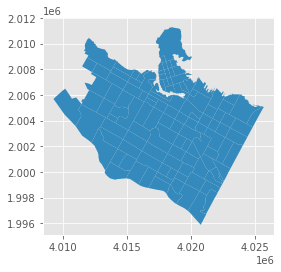

In [2]:
# Geodata in the city of Vancouver
districts = gpd.read_file('https://github.com/Jackeytanlor/DSSS_ASSESSMENT/raw/main/City_vancouverCT.geojson', driver="geojson")
districts.plot()

In [3]:
# 2011 census profile for National Household Survey (NHS)
census2011=pd.read_csv("https://raw.githubusercontent.com/Jackeytanlor/DSSS_ASSESSMENT/main/census2011.csv",encoding='gbk',low_memory=False)
census2011.head(3)

,Geo_Code,Prov_Name,CMA_CA_Name,CT_Name,GNR,Topic,Characteristic,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_Female
0,"9,150,102.0400",British Columbia,Kelowna,102.0400,36.2000,Citizenship,Total population in private households by citi...,1.0000,"5,820.0000",NaN,"2,745.0000",NaN,"3,070.0000",NaN
1,"9,150,102.0400",British Columbia,Kelowna,102.0400,36.2000,Citizenship,Canadian citizens,NaN,"5,665.0000",NaN,"2,685.0000",NaN,"2,980.0000",NaN
2,"9,150,102.0400",British Columbia,Kelowna,102.0400,36.2000,Citizenship,Canadian citizens aged under 18,NaN,800.0000,NaN,400.0000,NaN,395.0000,NaN


In [4]:
# 2011 census profile for CT statistical information
census2011_pop=pd.read_csv("https://raw.githubusercontent.com/Jackeytanlor/DSSS_ASSESSMENT/main/census2011_pop.csv", low_memory=False)
census2011_pop.head(3)

,Unnamed: 0,Geo_Code,Prov_Name,CMACA_Name,CT_Name,Topic,Characteristic,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_female
0,2302416,"9,330,187.1100",British Columbia,Vancouver,187.1100,Population and dwelling counts,Population in 2011,1.0000,"4,861.0000",NaN,NaN,...,NaN,...
1,2302417,"9,330,187.1100",British Columbia,Vancouver,187.1100,Population and dwelling counts,Population in 2006,1.0000,"3,442.0000",NaN,NaN,...,NaN,...
2,2302418,"9,330,187.1100",British Columbia,Vancouver,187.1100,Population and dwelling counts,2006 to 2011 population change (%),NaN,41.2000,NaN,NaN,...,NaN,...


In [5]:
# 2016 census profile
census2016=pd.read_csv("https://raw.githubusercontent.com/Jackeytanlor/DSSS_ASSESSMENT/main/census2016.csv", low_memory=False)
census2016.head(3)

,Unnamed: 0,CENSUS_YEAR,GEO_NAME,ALT_GEO_CODE,DIM: Profile of Census Tracts (2247),Member ID: Profile of Census Tracts (2247),Notes: Profile of Census Tracts (2247),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
0,0,2016,1.0100,933000101,"Population percentage change, 2011 to 2016",3,NaN,-0.3,...,...
1,1,2016,1.0100,933000101,Total private dwellings,4,3.0000,2334,...,...
2,2,2016,1.0100,933000101,Private dwellings occupied by usual residents,5,4.0000,2314,...,...


In [6]:
# 2011 and 2016 Crime incidents data
crime=pd.read_csv("https://raw.githubusercontent.com/Jackeytanlor/DSSS_ASSESSMENT/main/crime.csv")
crime.head(3)

,FID_1,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BL,NEIGHBOURH,X,Y,CTUID,CTNAME,CMANAME,Distance
0,46128,Break and Enter Commercial,2011,5,1,22,30,32XX W 43RD AVE,Kerrisdale,"487,044.7779","5,453,354.2740","9,330,008.0200",8.0200,Vancouver,0
1,46164,Break and Enter Commercial,2011,8,25,1,38,35XX W 41ST AVE,Dunbar-Southlands,"486,551.5064","5,453,566.1780","9,330,008.0200",8.0200,Vancouver,0
2,46165,Break and Enter Commercial,2011,12,14,4,25,35XX W 41ST AVE,Dunbar-Southlands,"486,586.7332","5,453,566.0120","9,330,008.0200",8.0200,Vancouver,0


Since the study required CT from the City of Vancouver, it is necessary to select correct Ctname from crime data

In [7]:
len_ct=len(crime[crime["YEAR"]==2011]["CTNAME"].unique())
print(f"The number of CT area in the city of Vancouver is {len_ct}")
ctname=list(crime["CTNAME"].unique())
print("")
print(f"The CT name can be shown as below:")
print(ctname)

The number of CT area in the city of Vancouver is 118

The CT name can be shown as below:
[8.02, 14.01, 14.02, 8.01, 59.13, 59.14, 5.0, 9.0, 11.0, 12.0, 27.02, 2.04, 13.03, 13.04, 27.01, 42.0, 63.0, 38.0, 44.0, 46.0, 48.0, 19.0, 58.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 16.05, 61.0, 62.0, 64.0, 65.0, 66.0, 68.0, 33.01, 33.02, 51.01, 51.02, 67.01, 67.02, 2.03, 16.06, 59.07, 59.08, 59.09, 59.1, 59.11, 32.0, 50.02, 52.01, 52.02, 13.01, 15.01, 15.02, 18.01, 18.02, 36.01, 36.02, 16.01, 49.01, 49.02, 55.02, 10.01, 10.02, 17.01, 17.02, 31.01, 31.02, 34.01, 34.02, 45.01, 45.02, 55.01, 2.01, 1.02, 1.01, 39.01, 39.02, 35.01, 35.02, 16.04, 37.01, 37.02, 40.01, 40.02, 41.01, 41.02, 43.01, 43.02, 50.03, 50.04, 53.01, 3.01, 3.02, 6.01, 6.02, 7.01, 7.02, 53.02, 54.01, 54.02, 56.01, 56.02, 57.01, 57.02, 59.06, 60.01, 60.02, 4.01, 4.02, 47.01, 47.02]


### 3.2.2 Data management

#### 3.2.2.1 Census profile 2011

In [8]:
census2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676800 entries, 0 to 676799
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Geo_Code        676800 non-null  float64
 1   Prov_Name       676800 non-null  object 
 2   CMA_CA_Name     676800 non-null  object 
 3   CT_Name         676800 non-null  float64
 4   GNR             676800 non-null  float64
 5   Topic           676800 non-null  object 
 6   Characteristic  676800 non-null  object 
 7   Note            127605 non-null  float64
 8   Total           674883 non-null  float64
 9   Flag_Total      1917 non-null    object 
 10  Male            583709 non-null  float64
 11  Flag_Male       93091 non-null   object 
 12  Female          583719 non-null  float64
 13  Flag_Female     93081 non-null   object 
dtypes: float64(7), object(7)
memory usage: 72.3+ MB


##### (1) Census profile for National Household Survey (NHS)

In [9]:
# Based on the CT name from city of Vancouver, Vancouver census profile data can be selected from BC province

census2011_vancouver=census2011[census2011["CMA_CA_Name"]=="Vancouver"]
census2011_van=census2011_vancouver[census2011_vancouver["CT_Name"].isin(ctname)]

print("CTname in 2011 census profile "+str(len(census2011_van["CT_Name"].unique())))

census2011_van.head(5)

CTname in 2011 census profile 116


,Geo_Code,Prov_Name,CMA_CA_Name,CT_Name,GNR,Topic,Characteristic,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_Female
134400,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Citizenship,Total population in private households by citi...,1.0000,"3,015.0000",NaN,"1,395.0000",NaN,"1,620.0000",NaN
134401,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Citizenship,Canadian citizens,NaN,"2,670.0000",NaN,"1,230.0000",NaN,"1,440.0000",NaN
134402,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Citizenship,Canadian citizens aged under 18,NaN,410.0000,NaN,175.0000,NaN,235.0000,NaN
134403,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Citizenship,Canadian citizens aged 18 and over,NaN,"2,255.0000",NaN,"1,050.0000",NaN,"1,210.0000",NaN
134404,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Citizenship,Not Canadian citizens,2.0000,345.0000,NaN,160.0000,NaN,185.0000,NaN


In [10]:
print("The number of indicator that in the Characteristic column is "+str(len(census2011_van.Characteristic.unique())))

The number of indicator that in the Characteristic column is 889


By using len() to calculate indicators in the dataset, we can know that there are more than 889 indicators, so we should select key indicators related to the research

##### (2) Census profile for CT statisticsal information

In [11]:
# select key indicators
list_census2011=["Population density per square kilometre","Land area (square km)","Median age of the population",
                 "    2001 to 2011","  Median income ($)","Prevalence of low income in 2010 based on after-tax low-income measure (%)",
                 "  North American Aboriginal origins","  Other North American origins","  European origins","  Caribbean origins",
                 "  Latin, Central and South American origins","  African origins","  Asian origins","  Oceania origins","  Movers",
                 "    University certificate, diploma or degree at bachelor level or above","Total population by age groups"]
census2011_indicator=census2011_van[census2011_van["Characteristic"].isin(list_census2011)]
census2011_indicator_sub=census2011_indicator.drop_duplicates(["CT_Name","Characteristic"],keep="first")
print("The number of indicator that in the Characteristic column is "+str(len(census2011_indicator_sub.Characteristic.unique())))
print("")
census2011_indicator_sub.head(13)

The number of indicator that in the Characteristic column is 13



,Geo_Code,Prov_Name,CMA_CA_Name,CT_Name,GNR,Topic,Characteristic,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_Female
134412,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Immigrant status and period of immigration,2001 to 2011,6.0000,480.0000,NaN,225.0000,NaN,255.0000,NaN
134568,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,North American Aboriginal origins,NaN,60.0000,NaN,0.0000,NaN,0.0000,NaN
134572,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,Other North American origins,NaN,80.0000,NaN,20.0000,NaN,70.0000,NaN
134582,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,European origins,NaN,410.0000,NaN,200.0000,NaN,215.0000,NaN
134653,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,Caribbean origins,NaN,0.0000,NaN,0.0000,NaN,0.0000,NaN
134673,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,"Latin, Central and South American origins",NaN,15.0000,NaN,10.0000,NaN,10.0000,NaN
134697,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,African origins,NaN,0.0000,NaN,0.0000,NaN,0.0000,NaN
134760,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,Asian origins,NaN,"2,545.0000",NaN,"1,180.0000",NaN,"1,360.0000",NaN
134821,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Ethnic origin population,Oceania origins,NaN,50.0000,NaN,0.0000,NaN,35.0000,NaN
134974,"9,330,014.0100",British Columbia,Vancouver,14.0100,32.5000,Mobility,Movers,NaN,330.0000,NaN,190.0000,NaN,135.0000,NaN


Apart from filtering ethnicity, education and migration indicators, population density and area from the 2011 census profile for CT statistical information needs to be filtered as well.

In [12]:
# Based on the CT name from city of Vancouver, Vancouver census profile data can be selected from BC province

census2011_pop=census2011_pop[census2011_pop["CT_Name"].isin(ctname)]
print("CTname in 2011 census profile "+str(len(census2011_pop['CT_Name'].unique())))
print("")

# select key indicators

census2011pop_indicator=census2011_pop[census2011_pop["Characteristic"].isin(list_census2011)]
print("The number of indicator that in the Characteristic column is "+str(len(census2011pop_indicator.Characteristic.unique())))
census2011pop_indicator.head()

CTname in 2011 census profile 116

The number of indicator that in the Characteristic column is 4


,Unnamed: 0,Geo_Code,Prov_Name,CMACA_Name,CT_Name,Topic,Characteristic,Note,Total,Flag_Total,Male,Flag_Male,Female,Flag_female
2837,2305253,"9,330,014.0100",British Columbia,Vancouver,14.0100,Population and dwelling counts,Population density per square kilometre,NaN,"5,918.7000",NaN,NaN,...,NaN,...
2838,2305254,"9,330,014.0100",British Columbia,Vancouver,14.0100,Population and dwelling counts,Land area (square km),NaN,0.5000,NaN,NaN,...,NaN,...
2839,2305255,"9,330,014.0100",British Columbia,Vancouver,14.0100,Age characteristics,Total population by age groups,4.0000,"2,985.0000",NaN,"1,420.0000",NaN,"1,565.0000",NaN
2863,2305279,"9,330,014.0100",British Columbia,Vancouver,14.0100,Age characteristics,Median age of the population,5.0000,42.4000,NaN,41.0000,NaN,43.3000,NaN
3309,2305725,"9,330,014.0200",British Columbia,Vancouver,14.0200,Population and dwelling counts,Population density per square kilometre,NaN,"7,526.6000",NaN,NaN,...,NaN,...


##### (3) Aggregate 2011 census profile data

By synchronising column names in two datasets,  two parts of census profile could be merged into a single profile through concat().

In [13]:
# merge data

a=census2011pop_indicator.iloc[0:,1:]
b=census2011_indicator_sub.drop(["GNR"],axis=1)
b.rename(columns={"CMA_CA_Name":"CMACA_Name"},inplace=True)
c=pd.concat([a,b]).sort_values(["CT_Name","Topic"])
census2011_All=c.iloc[0:,0:8]

# Reset the index of the table to CT name

census2011_All=census2011_All.drop(["Note"],axis=1).reset_index(drop=True)
census2011_All_index=census2011_All.set_index("CT_Name")
census2011_All_index.head()

,Geo_Code,Prov_Name,CMACA_Name,Topic,Characteristic,Total
CT_Name,,,,,,
1.0100,"9,330,001.0100",British Columbia,Vancouver,Age characteristics,Total population by age groups,"6,310.0000"
1.0100,"9,330,001.0100",British Columbia,Vancouver,Age characteristics,Median age of the population,45.0000
1.0100,"9,330,001.0100",British Columbia,Vancouver,Education,"University certificate, diploma or degree ...","1,340.0000"
1.0100,"9,330,001.0100",British Columbia,Vancouver,Ethnic origin population,North American Aboriginal origins,205.0000
1.0100,"9,330,001.0100",British Columbia,Vancouver,Ethnic origin population,Other North American origins,"1,145.0000"


As the variables used in the following data analysis are in the Characteristic column. Therefore, pivot() could be used to transform indicators from column Characteristics to row name. Each indicator could show the proportion or the number of people in each CT.

In [14]:
# Transform indicators from column Characteristics to row name
census2011_All_pivot=census2011_All_index.pivot(columns="Characteristic",values="Total")
census2011_All_pivot=census2011_All_pivot.reset_index()
census2011_All_pivot.columns.name=""
census2011_All_pivot.head(5)

,CT_Name,2001 to 2011,"University certificate, diploma or degree at bachelor level or above",African origins,Asian origins,Caribbean origins,European origins,"Latin, Central and South American origins",Median income ($),Movers,North American Aboriginal origins,Oceania origins,Other North American origins,Land area (square km),Median age of the population,Population density per square kilometre,Prevalence of low income in 2010 based on after-tax low-income measure (%),Total population by age groups
0,1.0100,585.0000,"1,340.0000",100.0000,"2,815.0000",40.0000,"2,870.0000",290.0000,"28,393.0000",695.0000,205.0000,55.0000,"1,145.0000",1.0200,45.0000,"6,189.1000",16.2000,"6,310.0000"
1,1.0200,660.0000,"1,265.0000",165.0000,"2,795.0000",30.0000,"1,630.0000",100.0000,"24,686.0000",435.0000,160.0000,20.0000,485.0000,1.8600,42.5000,"2,597.3000",20.8000,"4,835.0000"
2,2.0100,640.0000,"1,535.0000",155.0000,"3,575.0000",30.0000,"2,035.0000",150.0000,"29,695.0000",650.0000,105.0000,25.0000,725.0000,1.9400,41.3000,"3,079.2000",18.3000,"5,975.0000"
3,2.0300,415.0000,885.0000,0.0000,"3,390.0000",0.0000,450.0000,45.0000,"23,103.0000",285.0000,70.0000,40.0000,205.0000,0.7900,42.5000,"5,101.3000",17.2000,"4,005.0000"
4,2.0400,330.0000,945.0000,50.0000,"2,475.0000",15.0000,"1,295.0000",120.0000,"30,137.0000",345.0000,145.0000,30.0000,490.0000,0.7800,44.5000,"5,802.1000",12.6000,"4,500.0000"


Null value should be found in the data. After using .isnull().sum() to check null values and finding the specific rows with null values, the study decide to drop the row to clean the data. 

In [15]:
# Check null values from each column 
print(census2011_All_pivot.isnull().sum())


CT_Name                                                                       0
    2001 to 2011                                                              1
    University certificate, diploma or degree at bachelor level or above      0
  African origins                                                             0
  Asian origins                                                               0
  Caribbean origins                                                           0
  European origins                                                            0
  Latin, Central and South American origins                                   0
  Median income ($)                                                           0
  Movers                                                                      0
  North American Aboriginal origins                                           0
  Oceania origins                                                             0
  Other North American origins         

In [16]:
# check whether null values would effect the result
census2011_All_pivot[(census2011_All_pivot["    2001 to 2011"].isnull()|
                      census2011_All_pivot["Median age of the population"].isnull()|
                      census2011_All_pivot["Total population by age groups"].isnull())]

,CT_Name,2001 to 2011,"University certificate, diploma or degree at bachelor level or above",African origins,Asian origins,Caribbean origins,European origins,"Latin, Central and South American origins",Median income ($),Movers,North American Aboriginal origins,Oceania origins,Other North American origins,Land area (square km),Median age of the population,Population density per square kilometre,Prevalence of low income in 2010 based on after-tax low-income measure (%),Total population by age groups
14,8.0100,NaN,385.0000,30.0000,150.0000,20.0000,800.0000,25.0000,"21,197.0000",210.0000,755.0000,15.0000,140.0000,1.8400,41.6000,853.2000,0.0000,"1,565.0000"
98,58.0000,280.0000,350.0000,20.0000,760.0000,0.0000,895.0000,15.0000,"15,107.0000",130.0000,110.0000,0.0000,295.0000,1.1400,NaN,"3,321.1000",69.0000,NaN


In [17]:
# dropna() would be used to drop the rows with null values
census2011_All_pivot_na=census2011_All_pivot.dropna(axis=0,how='any')
census2011_All_pivot_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 115
Data columns (total 18 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   CT_Name                                                                     114 non-null    float64
 1       2001 to 2011                                                            114 non-null    float64
 2       University certificate, diploma or degree at bachelor level or above    114 non-null    float64
 3     African origins                                                           114 non-null    float64
 4     Asian origins                                                             114 non-null    float64
 5     Caribbean origins                                                         114 non-null    float64
 6     European origins                                

After cleaning null values, we could see that the column names were non-standard, so the study needs to standardize column names to merge with 2016 census profile in the next step.

In [18]:
census2011_All_pivot_na.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['CT_Name', '    2001 to 2011',
       '    University certificate, diploma or degree at bachelor level or above',
       '  African origins', '  Asian origins', '  Caribbean origins',
       '  European origins', '  Latin, Central and South American origins',
       '  Median income ($)', '  Movers',
       '  North American Aboriginal origins', '  Oceania origins',
       '  Other North American origins', 'Land area (square km)',
       'Median age of the population',
       'Population density per square kilometre',
       'Prevalence of low income in 2010 based on after-tax low-income measure (%)',
       'Total population by age groups'],
      dtype='object', name='')>

In [19]:
# Each column name would be standardized based on the checking process above in order
columns2011=['CT_Name', 'Immigrant_10y','high_certificate','African origins', 'Asian origins', 'Caribbean origins','European origins',
             'Latin origins','Median income', 'Movers_1y','North American Aboriginal origins', 'Oceania origins','Other North American origins', 
             'Land area','Median age','Population density', 'low income','Population']

census2011_All_pivot_na.columns=columns2011

In [20]:
# After the cleaning process, year label should be added in the data to distinct from 2016 census data
census2011_All_pivot_na["Year"]=2011
census2011_All_pivot_na.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,CT_Name,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year
0,1.0100,585.0000,"1,340.0000",100.0000,"2,815.0000",40.0000,"2,870.0000",290.0000,"28,393.0000",695.0000,205.0000,55.0000,"1,145.0000",1.0200,45.0000,"6,189.1000",16.2000,"6,310.0000",2011
1,1.0200,660.0000,"1,265.0000",165.0000,"2,795.0000",30.0000,"1,630.0000",100.0000,"24,686.0000",435.0000,160.0000,20.0000,485.0000,1.8600,42.5000,"2,597.3000",20.8000,"4,835.0000",2011
2,2.0100,640.0000,"1,535.0000",155.0000,"3,575.0000",30.0000,"2,035.0000",150.0000,"29,695.0000",650.0000,105.0000,25.0000,725.0000,1.9400,41.3000,"3,079.2000",18.3000,"5,975.0000",2011
3,2.0300,415.0000,885.0000,0.0000,"3,390.0000",0.0000,450.0000,45.0000,"23,103.0000",285.0000,70.0000,40.0000,205.0000,0.7900,42.5000,"5,101.3000",17.2000,"4,005.0000",2011
4,2.0400,330.0000,945.0000,50.0000,"2,475.0000",15.0000,"1,295.0000",120.0000,"30,137.0000",345.0000,145.0000,30.0000,490.0000,0.7800,44.5000,"5,802.1000",12.6000,"4,500.0000",2011


In [21]:
census2011_All_pivot_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 115
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CT_Name                            114 non-null    float64
 1   Immigrant_10y                      114 non-null    float64
 2   high_certificate                   114 non-null    float64
 3   African origins                    114 non-null    float64
 4   Asian origins                      114 non-null    float64
 5   Caribbean origins                  114 non-null    float64
 6   European origins                   114 non-null    float64
 7   Latin origins                      114 non-null    float64
 8   Median income                      114 non-null    float64
 9   Movers_1y                          114 non-null    float64
 10  North American Aboriginal origins  114 non-null    float64
 11  Oceania origins                    114 non-null    float64

By examining the above indicators, ethnic heterogeneity was a missing part of the data. Therefore, ethnicity needs to be calculated by formula. Since some of the ethnicity values in the data have a population of 0 and this phenomenon can cause errors in the calculations, the value of 0 would be set to 1.

In [22]:
census2011_agg=census2011_All_pivot_na
census2011_agg=census2011_agg.replace({'African origins':{0:1}, 'Asian origins':{0:1},'Caribbean origins':{0:1},'European origins':{0:1},'Latin origins':{0:1},'North American Aboriginal origins':{0:1}, 'Oceania origins':{0:1},'Other North American origins':{0:1}})
census2011_agg["Ethnicity"]=-census2011_agg["African origins"]/census2011_agg["Population"]*np.log10(census2011_agg["African origins"]/census2011_agg["Population"])-census2011_agg["Asian origins"]/census2011_agg["Population"]*np.log10(census2011_agg["Asian origins"]/census2011_agg["Population"])-census2011_agg["Caribbean origins"]/census2011_agg["Population"]*np.log10(census2011_agg["Caribbean origins"]/census2011_agg["Population"])-census2011_agg["European origins"]/census2011_agg["Population"]*np.log10(census2011_agg["European origins"]/census2011_agg["Population"])-census2011_agg["Latin origins"]/census2011_agg["Population"]*np.log10(census2011_agg["Latin origins"]/census2011_agg["Population"])-census2011_agg["North American Aboriginal origins"]/census2011_agg["Population"]*np.log10(census2011_agg["North American Aboriginal origins"]/census2011_agg["Population"])-census2011_agg["Oceania origins"]/census2011_agg["Population"]*np.log10(census2011_agg["Oceania origins"]/census2011_agg["Population"])-census2011_agg["Other North American origins"]/census2011_agg["Population"]*np.log10(census2011_agg["Other North American origins"]/census2011_agg["Population"])
census2011_agg.head()

,CT_Name,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity
0,1.0100,585.0000,"1,340.0000",100.0000,"2,815.0000",40.0000,"2,870.0000",290.0000,"28,393.0000",695.0000,205.0000,55.0000,"1,145.0000",1.0200,45.0000,"6,189.1000",16.2000,"6,310.0000",2011,0.6167
1,1.0200,660.0000,"1,265.0000",165.0000,"2,795.0000",30.0000,"1,630.0000",100.0000,"24,686.0000",435.0000,160.0000,20.0000,485.0000,1.8600,42.5000,"2,597.3000",20.8000,"4,835.0000",2011,0.5544
2,2.0100,640.0000,"1,535.0000",155.0000,"3,575.0000",30.0000,"2,035.0000",150.0000,"29,695.0000",650.0000,105.0000,25.0000,725.0000,1.9400,41.3000,"3,079.2000",18.3000,"5,975.0000",2011,0.5376
3,2.0300,415.0000,885.0000,1.0000,"3,390.0000",1.0000,450.0000,45.0000,"23,103.0000",285.0000,70.0000,40.0000,205.0000,0.7900,42.5000,"5,101.3000",17.2000,"4,005.0000",2011,0.3084
4,2.0400,330.0000,945.0000,50.0000,"2,475.0000",15.0000,"1,295.0000",120.0000,"30,137.0000",345.0000,145.0000,30.0000,490.0000,0.7800,44.5000,"5,802.1000",12.6000,"4,500.0000",2011,0.5379


#### 3.2.2.2 Census profile 2016

Similar to the 2011 census profile, the data cleaning process would be much simpler because the data was not split into two datasets.

In [23]:
# Based on the CT name from city of Vancouver, Vancouver census profile data can be selected from Metropolitan of Vancouver
census2016_van=census2016[census2016["GEO_NAME"].isin(ctname)]
print("The number of CT in 2016 census profile is "+str(len(census2016_van["GEO_NAME"].unique())))
census2016_van.head()

The number of CT in 2016 census profile is 118


,Unnamed: 0,CENSUS_YEAR,GEO_NAME,ALT_GEO_CODE,DIM: Profile of Census Tracts (2247),Member ID: Profile of Census Tracts (2247),Notes: Profile of Census Tracts (2247),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
0,0,2016,1.0100,933000101,"Population percentage change, 2011 to 2016",3,NaN,-0.3,...,...
1,1,2016,1.0100,933000101,Total private dwellings,4,3.0000,2334,...,...
2,2,2016,1.0100,933000101,Private dwellings occupied by usual residents,5,4.0000,2314,...,...
3,3,2016,1.0100,933000101,Population density per square kilometre,6,NaN,6172.0,...,...
4,4,2016,1.0100,933000101,Land area in square kilometres,7,NaN,1.02,...,...


In [24]:
# select key indicators base on the member id of each indicators
list_census2016=[6,7,8,40,2232,1148,1149,663,857,1692,1339,1343,1353,1427,1448,1473,1541,1607]
census2016_indicator=census2016_van[census2016_van["Member ID: Profile of Census Tracts (2247)"].isin(list_census2016)]
census2016_indicator.head(5)

,Unnamed: 0,CENSUS_YEAR,GEO_NAME,ALT_GEO_CODE,DIM: Profile of Census Tracts (2247),Member ID: Profile of Census Tracts (2247),Notes: Profile of Census Tracts (2247),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
3,3,2016,1.0100,933000101,Population density per square kilometre,6,NaN,6172.0,...,...
4,4,2016,1.0100,933000101,Land area in square kilometres,7,NaN,1.02,...,...
5,5,2016,1.0100,933000101,Total - Age groups and average age of the popu...,8,5.0000,6290,2840,3450
37,37,2016,1.0100,933000101,Median age of the population,40,6.0000,47.2,44.6,48.8
660,660,2016,1.0100,933000101,Median total income in 2015 among recipients ($),663,NaN,31232,34916,28504


In [25]:
# select key columns and maintain the total population of each characteristics
census2016_All=census2016_indicator.loc[:]
census2016_All["Total"]=census2016_All["Dim: Sex (3): Member ID: [1]: Total - Sex"]
census2016_All=census2016_All.loc[0:,["CENSUS_YEAR","GEO_NAME","ALT_GEO_CODE","DIM: Profile of Census Tracts (2247)","Member ID: Profile of Census Tracts (2247)","Total"]]
census2016_All=census2016_All.rename(columns={6:"Total"})
census2016_All=census2016_All.reset_index(drop=True)
census2016_All.head()

,CENSUS_YEAR,GEO_NAME,ALT_GEO_CODE,DIM: Profile of Census Tracts (2247),Member ID: Profile of Census Tracts (2247),Total
0,2016,1.0100,933000101,Population density per square kilometre,6,6172.0
1,2016,1.0100,933000101,Land area in square kilometres,7,1.02
2,2016,1.0100,933000101,Total - Age groups and average age of the popu...,8,6290
3,2016,1.0100,933000101,Median age of the population,40,47.2
4,2016,1.0100,933000101,Median total income in 2015 among recipients ($),663,31232


In [26]:
# Transform indicators from column Characteristics to row name
census2016_All_index=census2016_All.set_index("GEO_NAME")
census2016_All_pivot=census2016_All_index.pivot(columns="DIM: Profile of Census Tracts (2247)",values="Total").reset_index()
census2016_All_pivot.columns.name=""
census2016_All_pivot.head()

,GEO_NAME,2006 to 2010,2011 to 2016,African origins,Asian origins,Caribbean origins,European origins,Land area in square kilometres,"Latin, Central and South American origins",Median age of the population,Median total income in 2015 among recipients ($),Movers,North American Aboriginal origins,Oceania origins,Other North American origins,Population density per square kilometre,"Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)",Total - Age groups and average age of the population - 100% data,"University certificate, diploma or degree at bachelor level or above"
0,1.0100,325,180,225,2735,45,3090,1.02,260,47.2,31232,475,290,75,930,6172.0,12.9,6290,1430
1,1.0200,285,280,155,3445,30,1870,1.86,100,42.3,34432,815,80,30,465,2930.0,19.2,5460,1575
2,2.0100,225,200,135,3690,45,2190,1.94,190,43.8,34048,840,140,55,655,3169.9,15.7,6150,1695
3,2.0300,185,285,15,3455,30,585,0.79,65,43.5,26133,630,60,65,250,5192.3,17.2,4075,850
4,2.0400,285,260,110,2620,55,1545,0.78,90,46.0,32864,545,65,50,535,5809.8,15.0,4505,1140


In [27]:
census2016_All_pivot.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['GEO_NAME', '2006 to 2010', '2011 to 2016', 'African origins',
       'Asian origins', 'Caribbean origins', 'European origins',
       'Land area in square kilometres',
       'Latin, Central and South American origins',
       'Median age of the population',
       'Median total income in 2015 among recipients ($)', 'Movers',
       'North American Aboriginal origins', 'Oceania origins',
       'Other North American origins',
       'Population density per square kilometre',
       'Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)',
       'Total - Age groups and average age of the population - 100% data',
       'University certificate, diploma or degree at bachelor level or above'],
      dtype='object', name='')>

In [28]:
# Each column name would be standardized based on the checking process above in order
columns2016=['CT_Name', 'Immigrant_06_10', 'Immigrant_11_16','African origins', 'Asian origins', 'Caribbean origins','European origins','Land area',
             'Latin origins','Median age','Median income', 'Movers_1y','North American Aboriginal origins', 'Oceania origins','Other North American origins', 
             'Population density', 'low income','Population','high_certificate']
census2016_All_pivot_na=census2016_All_pivot.drop(14)
census2016_All_pivot_na=census2016_All_pivot_na.astype("float").reset_index(drop=True)
census2016_All_pivot_na.columns=columns2016

In [29]:
# After the cleaning process, year label should be added in the data to distinct from 2016 census data
census2016_All_pivot_na["Year"]=2016
census2016_All_pivot_na.head()

,CT_Name,Immigrant_06_10,Immigrant_11_16,African origins,Asian origins,Caribbean origins,European origins,Land area,Latin origins,Median age,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Population density,low income,Population,high_certificate,Year
0,1.0100,325.0000,180.0000,225.0000,"2,735.0000",45.0000,"3,090.0000",1.0200,260.0000,47.2000,"31,232.0000",475.0000,290.0000,75.0000,930.0000,"6,172.0000",12.9000,"6,290.0000","1,430.0000",2016
1,1.0200,285.0000,280.0000,155.0000,"3,445.0000",30.0000,"1,870.0000",1.8600,100.0000,42.3000,"34,432.0000",815.0000,80.0000,30.0000,465.0000,"2,930.0000",19.2000,"5,460.0000","1,575.0000",2016
2,2.0100,225.0000,200.0000,135.0000,"3,690.0000",45.0000,"2,190.0000",1.9400,190.0000,43.8000,"34,048.0000",840.0000,140.0000,55.0000,655.0000,"3,169.9000",15.7000,"6,150.0000","1,695.0000",2016
3,2.0300,185.0000,285.0000,15.0000,"3,455.0000",30.0000,585.0000,0.7900,65.0000,43.5000,"26,133.0000",630.0000,60.0000,65.0000,250.0000,"5,192.3000",17.2000,"4,075.0000",850.0000,2016
4,2.0400,285.0000,260.0000,110.0000,"2,620.0000",55.0000,"1,545.0000",0.7800,90.0000,46.0000,"32,864.0000",545.0000,65.0000,50.0000,535.0000,"5,809.8000",15.0000,"4,505.0000","1,140.0000",2016


In [30]:
# Check null values from each column 
census2016_All_pivot_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CT_Name                            117 non-null    float64
 1   Immigrant_06_10                    117 non-null    float64
 2   Immigrant_11_16                    117 non-null    float64
 3   African origins                    117 non-null    float64
 4   Asian origins                      117 non-null    float64
 5   Caribbean origins                  117 non-null    float64
 6   European origins                   117 non-null    float64
 7   Land area                          117 non-null    float64
 8   Latin origins                      117 non-null    float64
 9   Median age                         117 non-null    float64
 10  Median income                      117 non-null    float64
 11  Movers_1y                          117 non-null    float64

Apart from calculating ethnic heterogeneity, immigrant in the former 10 years should also be calculated since the statistics data came from 2006-2010 and 2011-2016 separately.

In [31]:
census2016_agg=census2016_All_pivot_na
census2016_agg=census2016_agg.replace({'African origins':{0:1}, 'Asian origins':{0:1},'Caribbean origins':{0:1},'European origins':{0:1},'Latin origins':{0:1},'North American Aboriginal origins':{0:1}, 'Oceania origins':{0:1},'Other North American origins':{0:1}})
census2016_agg["Immigrant_10y"]=census2016_agg["Immigrant_06_10"]+census2016_agg["Immigrant_11_16"]
census2016_agg["Ethnicity"]=-census2016_agg["African origins"]/census2016_agg["Population"]*np.log10(census2016_agg["African origins"]/census2016_agg["Population"])-census2016_agg["Asian origins"]/census2016_agg["Population"]*np.log10(census2016_agg["Asian origins"]/census2016_agg["Population"])-census2016_agg["Caribbean origins"]/census2016_agg["Population"]*np.log10(census2016_agg["Caribbean origins"]/census2016_agg["Population"])-census2016_agg["European origins"]/census2016_agg["Population"]*np.log10(census2016_agg["European origins"]/census2016_agg["Population"])-census2016_agg["Latin origins"]/census2016_agg["Population"]*np.log10(census2016_agg["Latin origins"]/census2016_agg["Population"])-census2016_agg["North American Aboriginal origins"]/census2016_agg["Population"]*np.log10(census2016_agg["North American Aboriginal origins"]/census2016_agg["Population"])-census2016_agg["Oceania origins"]/census2016_agg["Population"]*np.log10(census2016_agg["Oceania origins"]/census2016_agg["Population"])-census2016_agg["Other North American origins"]/census2016_agg["Population"]*np.log10(census2016_agg["Other North American origins"]/census2016_agg["Population"])
census2016_agg.head()

,CT_Name,Immigrant_06_10,Immigrant_11_16,African origins,Asian origins,Caribbean origins,European origins,Land area,Latin origins,Median age,...,North American Aboriginal origins,Oceania origins,Other North American origins,Population density,low income,Population,high_certificate,Year,Immigrant_10y,Ethnicity
0,1.0100,325.0000,180.0000,225.0000,"2,735.0000",45.0000,"3,090.0000",1.0200,260.0000,47.2000,...,290.0000,75.0000,930.0000,"6,172.0000",12.9000,"6,290.0000","1,430.0000",2016,505.0000,0.6405
1,1.0200,285.0000,280.0000,155.0000,"3,445.0000",30.0000,"1,870.0000",1.8600,100.0000,42.3000,...,80.0000,30.0000,465.0000,"2,930.0000",19.2000,"5,460.0000","1,575.0000",2016,565.0000,0.5041
2,2.0100,225.0000,200.0000,135.0000,"3,690.0000",45.0000,"2,190.0000",1.9400,190.0000,43.8000,...,140.0000,55.0000,655.0000,"3,169.9000",15.7000,"6,150.0000","1,695.0000",2016,425.0000,0.5508
3,2.0300,185.0000,285.0000,15.0000,"3,455.0000",30.0000,585.0000,0.7900,65.0000,43.5000,...,60.0000,65.0000,250.0000,"5,192.3000",17.2000,"4,075.0000",850.0000,2016,470.0000,0.3651
4,2.0400,285.0000,260.0000,110.0000,"2,620.0000",55.0000,"1,545.0000",0.7800,90.0000,46.0000,...,65.0000,50.0000,535.0000,"5,809.8000",15.0000,"4,505.0000","1,140.0000",2016,545.0000,0.5511


#### 3.2.2.3 Crime data

The crime data were counted on two-time series after filtering research crime types, 2011 and 2016, using neighbour and CT as study areas.

In [32]:
crime

,FID_1,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BL,NEIGHBOURH,X,Y,CTUID,CTNAME,CMANAME,Distance
0,46128,Break and Enter Commercial,2011,5,1,22,30,32XX W 43RD AVE,Kerrisdale,"487,044.7779","5,453,354.2740","9,330,008.0200",8.0200,Vancouver,0
1,46164,Break and Enter Commercial,2011,8,25,1,38,35XX W 41ST AVE,Dunbar-Southlands,"486,551.5064","5,453,566.1780","9,330,008.0200",8.0200,Vancouver,0
2,46165,Break and Enter Commercial,2011,12,14,4,25,35XX W 41ST AVE,Dunbar-Southlands,"486,586.7332","5,453,566.0120","9,330,008.0200",8.0200,Vancouver,0
3,46396,Break and Enter Commercial,2011,1,1,2,4,57XX COLLINGWOOD ST,Dunbar-Southlands,"486,743.7933","5,453,544.3060","9,330,008.0200",8.0200,Vancouver,0
4,48379,Break and Enter Residential/Other,2011,3,1,23,39,28XX W 49TH AVE,Kerrisdale,"487,678.3226","5,452,736.6300","9,330,008.0200",8.0200,Vancouver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71434,115471,Vehicle Collision or Pedestrian Struck (with I...,2016,3,16,18,5,ARBUTUS ST / CORNWALL AVE,Kitsilano,"488,899.0000","5,457,765.0000","9,330,047.0200",47.0200,Vancouver,0
71435,115607,Vehicle Collision or Pedestrian Struck (with I...,2016,1,23,17,26,CORNWALL AVE / MAPLE ST,Kitsilano,"489,072.0000","5,457,761.0000","9,330,047.0200",47.0200,Vancouver,0
71436,116708,Vehicle Collision or Pedestrian Struck (with I...,2016,5,10,9,15,YORK AVE / ARBUTUS ST,Kitsilano,"488,896.0000","5,457,665.0000","9,330,047.0200",47.0200,Vancouver,0
71437,116709,Vehicle Collision or Pedestrian Struck (with I...,2016,5,19,7,50,YORK AVE / MAPLE ST,Kitsilano,"489,067.0000","5,457,661.0000","9,330,047.0200",47.0200,Vancouver,0


In [33]:
crime["TYPE"].unique()

array(['Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Mischief', 'Other Theft', 'Theft from Vehicle',
       'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Vehicle Collision or Pedestrian Struck (with Fatality)'],
      dtype=object)

By examining the data, some types of crime incidents in the crime data would be not relevant to the study, so the crimes in the crime data about vehicles were removed.

In [34]:
crime_All=crime[(crime.TYPE!='Vehicle Collision or Pedestrian Struck (with Injury)')|(crime.TYPE!='Vehicle Collision or Pedestrian Struck (with Fatality)')]
crime_All=crime_All.reset_index(drop=True)
crime_All.head(5)

,FID_1,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BL,NEIGHBOURH,X,Y,CTUID,CTNAME,CMANAME,Distance
0,46128,Break and Enter Commercial,2011,5,1,22,30,32XX W 43RD AVE,Kerrisdale,"487,044.7779","5,453,354.2740","9,330,008.0200",8.0200,Vancouver,0
1,46164,Break and Enter Commercial,2011,8,25,1,38,35XX W 41ST AVE,Dunbar-Southlands,"486,551.5064","5,453,566.1780","9,330,008.0200",8.0200,Vancouver,0
2,46165,Break and Enter Commercial,2011,12,14,4,25,35XX W 41ST AVE,Dunbar-Southlands,"486,586.7332","5,453,566.0120","9,330,008.0200",8.0200,Vancouver,0
3,46396,Break and Enter Commercial,2011,1,1,2,4,57XX COLLINGWOOD ST,Dunbar-Southlands,"486,743.7933","5,453,544.3060","9,330,008.0200",8.0200,Vancouver,0
4,48379,Break and Enter Residential/Other,2011,3,1,23,39,28XX W 49TH AVE,Kerrisdale,"487,678.3226","5,452,736.6300","9,330,008.0200",8.0200,Vancouver,0


In [35]:
#Count data in neighbour level
crime_neighbour=crime_All.groupby(["NEIGHBOURH","YEAR"]).count().iloc[0:,0:1]
crime_neighbour=crime_neighbour.reset_index()
crime_neighbour.head()

,NEIGHBOURH,YEAR,FID_1
0,Arbutus Ridge,2011,344
1,Arbutus Ridge,2016,481
2,Central Business District,2011,7903
3,Central Business District,2016,12332
4,Dunbar-Southlands,2011,543


In [36]:
#Count data in CT level
crime_ct=crime_All.groupby(["CTNAME","YEAR"]).count().iloc[0:,0:1]
crime_ct=crime_ct.reset_index().set_index("CTNAME").pivot(columns="YEAR",values="FID_1")
crime_ct.columns.name=""
crime_ct.head()

,2011,2016
CTNAME,,
1.0100,87,82
1.0200,87,139
2.0100,146,91
2.0300,112,65
2.0400,86,76


#### 3.2.2.4 Data Aggregation

In [37]:
#Check the output of the cleanning data
census2011_agg.info()
print("")
print("-----------------------------------------")
print("")
census2016_agg.info()
print("")
print("-----------------------------------------")
print("")
crime_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 115
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CT_Name                            114 non-null    float64
 1   Immigrant_10y                      114 non-null    float64
 2   high_certificate                   114 non-null    float64
 3   African origins                    114 non-null    float64
 4   Asian origins                      114 non-null    float64
 5   Caribbean origins                  114 non-null    float64
 6   European origins                   114 non-null    float64
 7   Latin origins                      114 non-null    float64
 8   Median income                      114 non-null    float64
 9   Movers_1y                          114 non-null    float64
 10  North American Aboriginal origins  114 non-null    float64
 11  Oceania origins                    114 non-null    float64

Since each value was shown in the same index, join() could be used in the following process to merge crime data from each year with different census data.

In [38]:
# Merge crime data with 2011 census data
crime_join2011=crime_ct.iloc[0:,0:1].rename(columns={2011:"Crime"})
census2011_agg_join=census2011_agg.set_index("CT_Name").join(crime_join2011)
census2011_agg_join.head()

,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity,Crime
CT_Name,,,,,,,,,,,,,,,,,,,,
1.0100,585.0000,"1,340.0000",100.0000,"2,815.0000",40.0000,"2,870.0000",290.0000,"28,393.0000",695.0000,205.0000,55.0000,"1,145.0000",1.0200,45.0000,"6,189.1000",16.2000,"6,310.0000",2011,0.6167,87
1.0200,660.0000,"1,265.0000",165.0000,"2,795.0000",30.0000,"1,630.0000",100.0000,"24,686.0000",435.0000,160.0000,20.0000,485.0000,1.8600,42.5000,"2,597.3000",20.8000,"4,835.0000",2011,0.5544,87
2.0100,640.0000,"1,535.0000",155.0000,"3,575.0000",30.0000,"2,035.0000",150.0000,"29,695.0000",650.0000,105.0000,25.0000,725.0000,1.9400,41.3000,"3,079.2000",18.3000,"5,975.0000",2011,0.5376,146
2.0300,415.0000,885.0000,1.0000,"3,390.0000",1.0000,450.0000,45.0000,"23,103.0000",285.0000,70.0000,40.0000,205.0000,0.7900,42.5000,"5,101.3000",17.2000,"4,005.0000",2011,0.3084,112
2.0400,330.0000,945.0000,50.0000,"2,475.0000",15.0000,"1,295.0000",120.0000,"30,137.0000",345.0000,145.0000,30.0000,490.0000,0.7800,44.5000,"5,802.1000",12.6000,"4,500.0000",2011,0.5379,86


In [39]:
# Merge crime data with 2016 census data
crime_join2016=crime_ct.iloc[0:,1:2].rename(columns={2016:"Crime"})
census2016_agg_join=census2016_agg.set_index("CT_Name").join(crime_join2016)
census2016_agg_join.head()

,Immigrant_06_10,Immigrant_11_16,African origins,Asian origins,Caribbean origins,European origins,Land area,Latin origins,Median age,Median income,...,Oceania origins,Other North American origins,Population density,low income,Population,high_certificate,Year,Immigrant_10y,Ethnicity,Crime
CT_Name,,,,,,,,,,,,,,,,,,,,,
1.0100,325.0000,180.0000,225.0000,"2,735.0000",45.0000,"3,090.0000",1.0200,260.0000,47.2000,"31,232.0000",...,75.0000,930.0000,"6,172.0000",12.9000,"6,290.0000","1,430.0000",2016,505.0000,0.6405,82
1.0200,285.0000,280.0000,155.0000,"3,445.0000",30.0000,"1,870.0000",1.8600,100.0000,42.3000,"34,432.0000",...,30.0000,465.0000,"2,930.0000",19.2000,"5,460.0000","1,575.0000",2016,565.0000,0.5041,139
2.0100,225.0000,200.0000,135.0000,"3,690.0000",45.0000,"2,190.0000",1.9400,190.0000,43.8000,"34,048.0000",...,55.0000,655.0000,"3,169.9000",15.7000,"6,150.0000","1,695.0000",2016,425.0000,0.5508,91
2.0300,185.0000,285.0000,15.0000,"3,455.0000",30.0000,585.0000,0.7900,65.0000,43.5000,"26,133.0000",...,65.0000,250.0000,"5,192.3000",17.2000,"4,075.0000",850.0000,2016,470.0000,0.3651,65
2.0400,285.0000,260.0000,110.0000,"2,620.0000",55.0000,"1,545.0000",0.7800,90.0000,46.0000,"32,864.0000",...,50.0000,535.0000,"5,809.8000",15.0000,"4,505.0000","1,140.0000",2016,545.0000,0.5511,76


In [40]:
# merge 2011 and 2016 data and finally built up the analysis dataset
census_agg=pd.concat([census2011_agg_join,census2016_agg_join])
census=census_agg.drop(["Immigrant_06_10","Immigrant_11_16"],axis=1)
census.head()

,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity,Crime
CT_Name,,,,,,,,,,,,,,,,,,,,
1.0100,585.0000,"1,340.0000",100.0000,"2,815.0000",40.0000,"2,870.0000",290.0000,"28,393.0000",695.0000,205.0000,55.0000,"1,145.0000",1.0200,45.0000,"6,189.1000",16.2000,"6,310.0000",2011,0.6167,87
1.0200,660.0000,"1,265.0000",165.0000,"2,795.0000",30.0000,"1,630.0000",100.0000,"24,686.0000",435.0000,160.0000,20.0000,485.0000,1.8600,42.5000,"2,597.3000",20.8000,"4,835.0000",2011,0.5544,87
2.0100,640.0000,"1,535.0000",155.0000,"3,575.0000",30.0000,"2,035.0000",150.0000,"29,695.0000",650.0000,105.0000,25.0000,725.0000,1.9400,41.3000,"3,079.2000",18.3000,"5,975.0000",2011,0.5376,146
2.0300,415.0000,885.0000,1.0000,"3,390.0000",1.0000,450.0000,45.0000,"23,103.0000",285.0000,70.0000,40.0000,205.0000,0.7900,42.5000,"5,101.3000",17.2000,"4,005.0000",2011,0.3084,112
2.0400,330.0000,945.0000,50.0000,"2,475.0000",15.0000,"1,295.0000",120.0000,"30,137.0000",345.0000,145.0000,30.0000,490.0000,0.7800,44.5000,"5,802.1000",12.6000,"4,500.0000",2011,0.5379,86


In [41]:
crime_ct.head()

,2011,2016
CTNAME,,
1.0100,87,82
1.0200,87,139
2.0100,146,91
2.0300,112,65
2.0400,86,76


In [42]:
crime_neighbour.head()

,NEIGHBOURH,YEAR,FID_1
0,Arbutus Ridge,2011,344
1,Arbutus Ridge,2016,481
2,Central Business District,2011,7903
3,Central Business District,2016,12332
4,Dunbar-Southlands,2011,543


In [43]:
crime_ne=crime_neighbour.reset_index().set_index("NEIGHBOURH").pivot(columns="YEAR",values="FID_1").reset_index()
crime_ne.columns.name=""
crime_ne

ne2011=list(crime_ne[2011])
ne2016=list(crime_ne[2016])
neighbour=list(crime_ne["NEIGHBOURH"])
crime_ne.columns=["NEIGHBOURH","crime2011","crime2016"]
crime_ne.head()

,NEIGHBOURH,crime2011,crime2016
0,Arbutus Ridge,344,481
1,Central Business District,7903,12332
2,Dunbar-Southlands,543,458
3,Fairview,1875,2313
4,Grandview-Woodland,1607,2217


#### 3.2.2.5 Data description

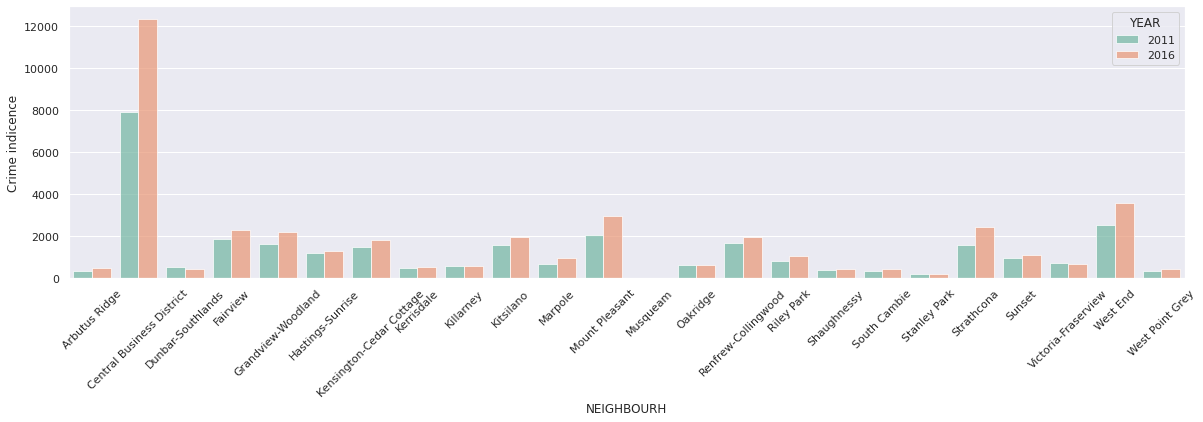

In [44]:
# plot the general crime data from neighbourhood level
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
# grouped barplot
p1=sns.barplot(x="NEIGHBOURH", y="FID_1", hue="YEAR", data=crime_neighbour, ci=None, alpha=0.7, palette="Set2")
p1.set_ylabel("Crime indicence")
plt.show()

As we can see the crime data on a bigger scale, crime incidents can be found to be on the rising trend.

In [45]:
crime_ct.columns=["crime2011","crime2016"]
districts["CTNAME"]=districts["CTNAME"].astype("float")
districts_index=districts.sort_values("CTNAME").set_index("CTNAME")
districts_crime=districts_index.join(crime_ct)

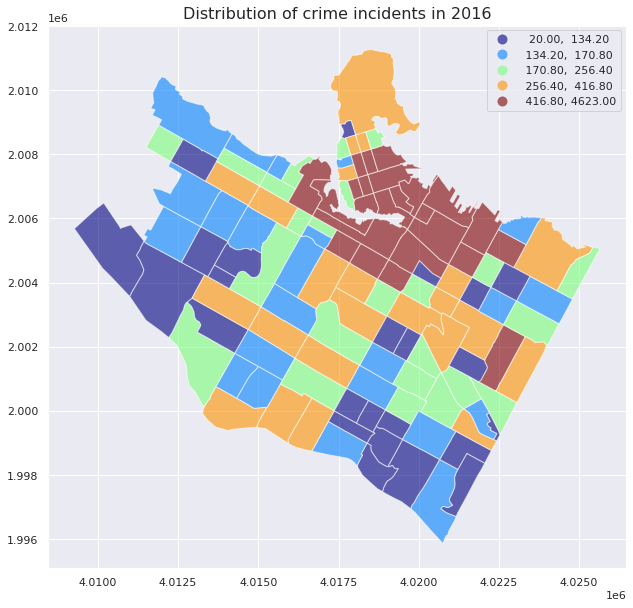

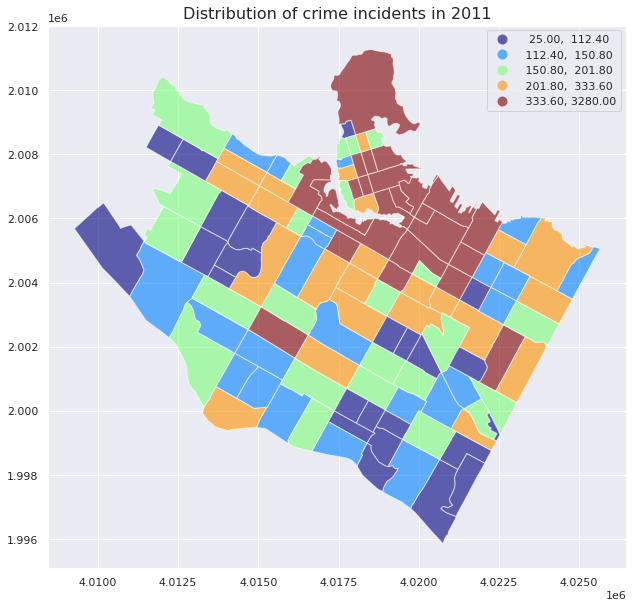

In [46]:
# plot crime incidents maps
districts_crime.plot(column='crime2016',  legend=True,linewidth=1,scheme='Quantiles',figsize=(15, 10), cmap='jet', alpha=0.6)
plt.title('Distribution of crime incidents in 2016', fontsize=16)
districts_crime.plot(column='crime2011',  legend=True,linewidth=1,scheme='Quantiles',figsize=(15, 10), cmap='jet', alpha=0.6)
plt.title('Distribution of crime incidents in 2011', fontsize=16)
plt.show()

The crime data for 2011 and 2016 shows that the number of crime incidents in the northern region was significantly greater than in most of the southern area. There is a clear unbalance in crime problems, which also proves that the causes would be related to the economic and social situation of the public.

In [47]:
census.describe()

,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity,Crime
count,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000,231.0000
mean,618.8095,"1,739.8918",75.4026,"2,565.6710",32.1645,"2,459.6320",115.4416,"31,277.8528",890.6710,137.0996,46.2294,645.1082,0.9865,40.6519,"8,331.5286",19.9554,"5,275.8658","2,013.5325",0.4930,300.9351
std,307.9762,888.7574,51.4644,"1,411.4867",26.6677,"1,319.4199",74.1267,"8,571.0551",426.9308,109.8771,35.5726,329.9712,0.6765,4.0597,"6,760.4454",7.5742,"1,480.9855",2.5052,0.0886,455.1671
min,125.0000,220.0000,1.0000,355.0000,1.0000,310.0000,1.0000,"15,134.0000",205.0000,1.0000,1.0000,75.0000,0.1200,31.7000,"1,184.3000",9.5000,"2,700.0000","2,011.0000",0.2201,59.0000
25%,392.5000,"1,117.5000",37.5000,"1,352.5000",10.0000,"1,317.5000",62.5000,"24,326.0000",587.5000,65.0000,22.5000,400.0000,0.5400,37.7500,"4,350.2000",15.0500,"4,222.5000","2,011.0000",0.4321,133.0000
50%,550.0000,"1,555.0000",65.0000,"2,320.0000",30.0000,"2,375.0000",95.0000,"29,695.0000",815.0000,115.0000,40.0000,605.0000,0.8100,40.4000,"6,302.2000",18.4000,"4,970.0000","2,016.0000",0.5138,183.0000
75%,790.0000,"2,202.5000",105.0000,"3,710.0000",50.0000,"3,355.0000",165.0000,"37,917.0000","1,075.0000",172.5000,65.0000,832.5000,1.3400,43.0500,"9,143.1500",22.9000,"6,250.0000","2,016.0000",0.5517,313.5000
max,"2,040.0000","7,320.0000",325.0000,"5,915.0000",120.0000,"8,925.0000",380.0000,"57,280.0000","3,030.0000",725.0000,230.0000,"2,495.0000",4.0700,54.3000,"39,951.5000",69.5000,"13,855.0000","2,016.0000",0.6898,"4,623.0000"


# 4 Methodology

## 4.1 Correlation analysis

By using correlation analysis, the results of the correlation between each indicator were used to assess the accuracy of the selection of indicators and to explore the data for the following regression analysis.

## 4.2 Regression analysis

This study would try to use regression analysis to explain the relationship between ethnicity, immigration and crime and to find indicators that have a significant impact on the incidence of crime. Multiple regression models including the linear regression model and random forest model would be used to improve the accuracy of the model. In linear regression, two methods, VIF and lasso, would be used to exclude multicollinearity problems and select significant variables. When it comes to random forest, the study would also use lasso model result and a preliminary random forest model to explore significant variables. 

## 4.3 Clustering analysis

After normalizing the data, the research would choose indicators from the final regression model to cluster data by K-mean clustering.

# 5 Data analysis and result

- Build the correlation matrix
- Build the linear regression model by using VIF and lasso method
- Build the Random forest model
- Comparison of regression result and model selection
- K-mean clustering analysis

## 5.1 Pearson correlation analysis

The research used corr() to do the correlation analysis. Besides, correlation matrix could easily show the performance of each variables.

In [48]:
corr=list(census.columns)
RELAT=census.corr()
RELAT

,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity,Crime
Immigrant_10y,1.0000,0.2739,0.1247,0.6787,0.0290,-0.0825,0.2362,-0.2042,0.3427,-0.2546,0.0913,-0.0834,0.1219,-0.0874,0.0576,0.1031,0.5356,-0.0606,-0.3217,0.1382
high_certificate,0.2739,1.0000,0.4434,-0.1297,0.5230,0.8492,0.4552,0.7185,0.7722,0.1224,0.4924,0.7871,0.0717,-0.2686,0.2285,-0.1952,0.6316,0.1497,0.3639,0.4308
African origins,0.1247,0.4434,1.0000,-0.0577,0.4565,0.5221,0.4779,0.2515,0.4743,0.4989,0.2738,0.5113,-0.0213,-0.2091,0.2098,0.0796,0.4696,0.1539,0.5443,0.2586
Asian origins,0.6787,-0.1297,-0.0577,1.0000,-0.1454,-0.4205,0.0899,-0.5151,-0.0029,-0.2649,0.0182,-0.3170,0.2272,0.0314,-0.2241,-0.0769,0.5344,0.0385,-0.5221,-0.0347
Caribbean origins,0.0290,0.5230,0.4565,-0.1454,1.0000,0.6118,0.4612,0.3850,0.4960,0.3546,0.3616,0.6108,0.0086,-0.3156,0.1116,-0.1458,0.4345,0.1616,0.4989,0.2711
European origins,-0.0825,0.8492,0.5221,-0.4205,0.6118,1.0000,0.4634,0.7050,0.6855,0.4066,0.5255,0.9438,0.0269,-0.2923,0.2162,-0.1839,0.5174,0.0653,0.6193,0.3328
Latin origins,0.2362,0.4552,0.4779,0.0899,0.4612,0.4634,1.0000,0.1899,0.6526,0.3743,0.3266,0.4590,-0.1632,-0.4241,0.4235,0.0666,0.5515,0.1849,0.4467,0.4154
Median income,-0.2042,0.7185,0.2515,-0.5151,0.3850,0.7050,0.1899,1.0000,0.3813,-0.0013,0.3654,0.6172,0.0073,-0.1046,0.2020,-0.4492,0.1042,0.2844,0.4184,0.1793
Movers_1y,0.3427,0.7722,0.4743,-0.0029,0.4960,0.6855,0.6526,0.3813,1.0000,0.2858,0.4466,0.6161,-0.1143,-0.5278,0.4343,0.0921,0.6516,0.0618,0.3556,0.5733
North American Aboriginal origins,-0.2546,0.1224,0.4989,-0.2649,0.3546,0.4066,0.3743,-0.0013,0.2858,1.0000,0.2621,0.4349,-0.0570,-0.2104,0.0614,0.3169,0.2264,0.1027,0.6333,0.2861


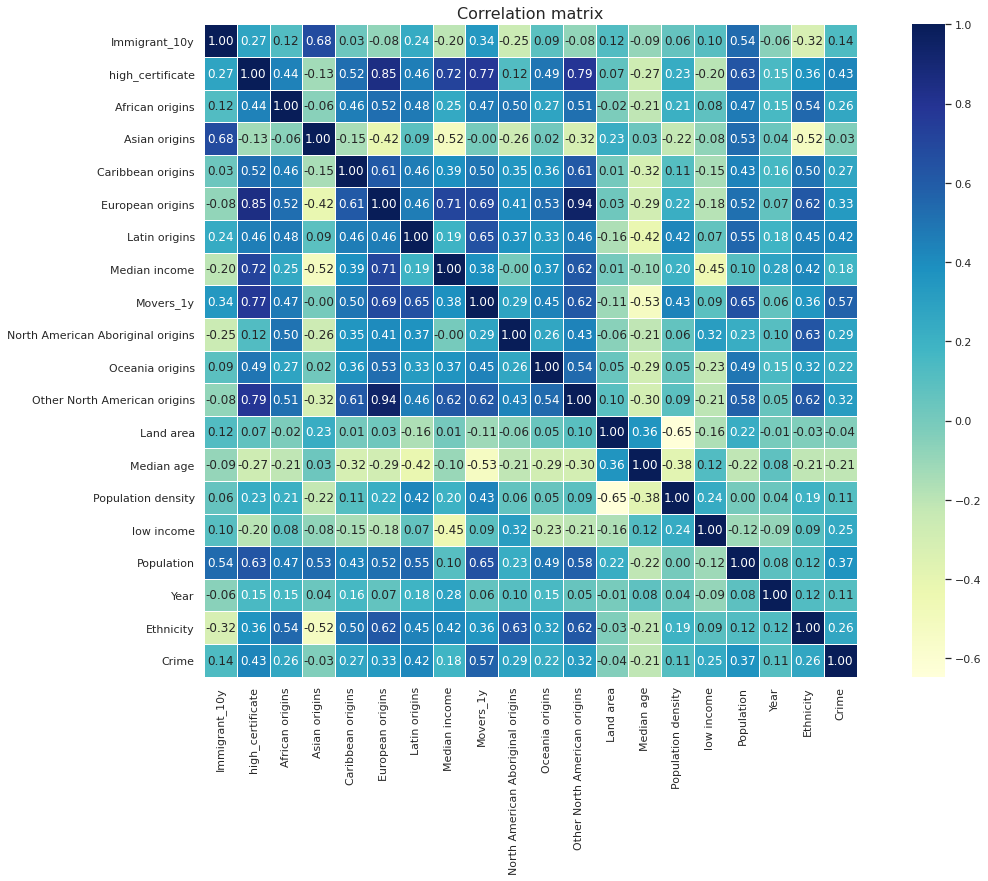

In [49]:
# heatmap() was used to perform the matrix
plt.figure(figsize=(20, 12))
hm = sns.heatmap(RELAT,cbar=True,annot=True,
                 square=True,fmt='.2f',
                 annot_kws={'size':12},
                 yticklabels=corr,
                 xticklabels=corr,
                cmap="YlGnBu",
                 linewidths=.5)
plt.title('Correlation matrix', fontsize=16)
plt.show()

As correlation shown above, crime had the highest correlation coefficient with mover_1y (0.5) while had the lowest correlation coefficient with Asian ethnicity (-0.03). It showed that crime may be correlated with mobility while not being specifically associated with some ethnic groups. On the other hand, the correlation between each ethnic group was quite high. It also means that not only do different ethnic groups generated in different communities, but also some ethnic groups may be associated with each other within communities. Therefore, multicollinearity would need to be carefully considered in the following regression analysis.

## 5.2 Set up training and testing data

train_test_split() should be apply before build up a regression to set up train and test data.

In [50]:
# Create independent variable data
X = census.drop(['Crime'], axis=1)
# Create dependent variable data
Y = census['Crime']

In [51]:
# In the spliting process the proportion of test data would be 30% of the whole dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

The following below is the overview of trainning data about independent variables:

In [52]:
X_train.head()

,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity
CT_Name,,,,,,,,,,,,,,,,,,,
34.0200,665.0000,"1,770.0000",135.0000,"4,195.0000",45.0000,"2,710.0000",175.0000,"27,365.0000",965.0000,180.0000,30.0000,835.0000,1.3400,39.7000,"5,452.2000",17.0000,"7,300.0000",2016,0.5397
67.0200,905.0000,"2,275.0000",95.0000,"2,160.0000",10.0000,"2,430.0000",165.0000,"37,148.0000","1,130.0000",75.0000,20.0000,435.0000,0.2400,41.5000,"20,276.1000",24.0000,"4,775.0000",2016,0.5282
11.0000,880.0000,"1,625.0000",50.0000,"5,240.0000",20.0000,"1,275.0000",130.0000,"24,647.0000","1,145.0000",85.0000,55.0000,355.0000,1.5700,39.5000,"4,207.5000",18.7000,"6,615.0000",2016,0.3849
62.0000,250.0000,"1,680.0000",100.0000,395.0000,50.0000,"2,895.0000",75.0000,"42,438.0000",570.0000,115.0000,20.0000,575.0000,0.1700,52.2000,"20,296.2000",16.6000,"3,425.0000",2016,0.4705
8.0200,420.0000,"1,930.0000",45.0000,"1,460.0000",1.0000,"2,755.0000",10.0000,"38,952.0000",610.0000,65.0000,35.0000,615.0000,3.5500,46.3000,"1,208.8000",12.4000,"4,285.0000",2011,0.4761


The following below is the overview of testing data about independent variables:

In [53]:
X_test.head()

,Immigrant_10y,high_certificate,African origins,Asian origins,Caribbean origins,European origins,Latin origins,Median income,Movers_1y,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Population,Year,Ethnicity
CT_Name,,,,,,,,,,,,,,,,,,,
49.0100,830.0000,"4,050.0000",135.0000,"2,235.0000",120.0000,"5,545.0000",170.0000,"43,643.0000","2,525.0000",200.0000,80.0000,"1,240.0000",1.5500,37.6000,"5,272.4000",14.2000,"8,175.0000",2011,0.5430
20.0000,290.0000,905.0000,20.0000,"1,430.0000",10.0000,690.0000,20.0000,"35,456.0000",205.0000,10.0000,45.0000,105.0000,1.3900,53.6000,"1,937.8000",17.3000,"2,700.0000",2016,0.4317
36.0100,685.0000,"1,040.0000",85.0000,"4,925.0000",20.0000,"1,200.0000",85.0000,"24,733.0000",750.0000,80.0000,15.0000,410.0000,1.3700,43.0000,"4,543.6000",15.9000,"6,225.0000",2016,0.3857
67.0100,410.0000,"1,500.0000",50.0000,775.0000,25.0000,"2,645.0000",175.0000,"30,496.0000",760.0000,175.0000,35.0000,580.0000,0.1900,40.8000,"20,246.9000",28.8000,"3,775.0000",2016,0.5562
47.0200,370.0000,"2,145.0000",70.0000,530.0000,20.0000,"3,435.0000",190.0000,"46,702.0000",970.0000,150.0000,70.0000,795.0000,0.3900,35.0000,"10,469.6000",14.1000,"4,100.0000",2016,0.5034


In [54]:
X_train.columns

Index(['Immigrant_10y', 'high_certificate', 'African origins', 'Asian origins',
       'Caribbean origins', 'European origins', 'Latin origins',
       'Median income', 'Movers_1y', 'North American Aboriginal origins',
       'Oceania origins', 'Other North American origins', 'Land area',
       'Median age', 'Population density', 'low income', 'Population', 'Year',
       'Ethnicity'],
      dtype='object')

## 5.3 Linear Regression model

### 5.3.1 Variance InFlation Factor(VIF)

VIF is a method to measure multicollinearity problems in linear regression model. Variables with high VIF values might show a serious multicollinearity problem. Each VIF value from independent variables could be calculated in the following steps.

In [55]:
def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [56]:
X_train_VIF=drop_column_using_vif_(X_train, list_var_not_to_remove=None, thresh=5)
print(X_train_VIF.columns)

Max VIF: 55.32068653026691
Dropping: Population
Max VIF: 34.3563643950828
Dropping: European origins
Max VIF: 13.271190748013055
Dropping: high_certificate
Max VIF: 7.313618047452786
Dropping: Asian origins
Max VIF: 5.456806453503234
Dropping: Movers_1y
Max VIF: 4.658841952209003
Index(['Immigrant_10y', 'African origins', 'Caribbean origins',
       'Latin origins', 'Median income', 'North American Aboriginal origins',
       'Oceania origins', 'Other North American origins', 'Land area',
       'Median age', 'Population density', 'low income', 'Year', 'Ethnicity'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


As shwn above, some variables including population, European origins, high_certificate, median income and movers were dropped from the data. Then the research would begin to build the linear regression model through statsmodels.

In [57]:
X_train_VIF.head(5)

,Immigrant_10y,African origins,Caribbean origins,Latin origins,Median income,North American Aboriginal origins,Oceania origins,Other North American origins,Land area,Median age,Population density,low income,Year,Ethnicity
CT_Name,,,,,,,,,,,,,,
34.0200,665.0000,135.0000,45.0000,175.0000,"27,365.0000",180.0000,30.0000,835.0000,1.3400,39.7000,"5,452.2000",17.0000,2016,0.5397
67.0200,905.0000,95.0000,10.0000,165.0000,"37,148.0000",75.0000,20.0000,435.0000,0.2400,41.5000,"20,276.1000",24.0000,2016,0.5282
11.0000,880.0000,50.0000,20.0000,130.0000,"24,647.0000",85.0000,55.0000,355.0000,1.5700,39.5000,"4,207.5000",18.7000,2016,0.3849
62.0000,250.0000,100.0000,50.0000,75.0000,"42,438.0000",115.0000,20.0000,575.0000,0.1700,52.2000,"20,296.2000",16.6000,2016,0.4705
8.0200,420.0000,45.0000,1.0000,10.0000,"38,952.0000",65.0000,35.0000,615.0000,3.5500,46.3000,"1,208.8000",12.4000,2011,0.4761


In [58]:
regressor_OLS = sm.OLS(endog=Y_train, exog=sm.add_constant(X_train_VIF)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     6.612
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           2.93e-10
Time:                        13:39:52   Log-Likelihood:                -1177.6
No. Observations:                 161   AIC:                             2385.
Df Residuals:                     146   BIC:                             2431.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -361.3365   2.88e+04     -0.013      0.990   -5.72e+04    5.65e+04
Immigrant_10y                         0.0169      0.143      0.119      0.906      -0.265       0.299
African origins                       0.0742      0.783      0.095      0.925      -1.474       1.622
Caribbean origins                     0.4009      1.676      0.239      0.811      -2.911       3.713
Latin origins                         3.0166      0.729      4.138      0.000       1.576       4.457
Median income                         0.0245      0.007      3.627      0.000       0.011       0.038
North American Aboriginal origins     0.6041      0.520      1.163      0.247      -0.423       1.631
Oceania origins                      -0.3157      1.273     -0.248      0.804      -2.831       2.200
Other North American origins          0.0050      0.189      0.027      0.979      -0.369       0.379
Land area                           -38.7118     63.111     -0.613      0.541    -163.440      86.016
Median age                           -8.1064     11.050     -0.734      0.464     -29.946      13.733
Population density                   -0.0239      0.007     -3.333      0.001      -0.038      -0.010
low income                           35.8336      7.481      4.790      0.000      21.049      50.619
Year                                 -0.0448     14.332     -0.003      0.998     -28.369      28.280
Ethnicity                         -1238.6534    614.207     -2.017      0.046   -2452.538     -24.769
==============================================================================
Omnibus:                      211.663   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12391.631
Skew:                           5.204   Prob(JB):                         0.00
Kurtosis:                      44.700   Cond. No.                     3.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the result of the train data. R-squared of the model is 0.388. The result of the model can not fit data well when using VIF method. Besides, p-value from most of variables were higher. It means that the setting of independent variables could not significantly impact crime incident.

Test data would be used to built the linear regression model seperately. The result were as follow.

In [59]:
# Linear regression model with training data
lr = LinearRegression()
lr.fit(X_train_VIF,Y_train)
X_test_VIF=X_test.loc[:,X_train_VIF.columns]
print("The score of test data was "+str(lr.score(X_test_VIF,Y_test)))

The score of test data was 0.15501512684792307


There would be still a problem that the R-square of the model from test data were hugely different from test data. It also proved that the model was not stable.

### 5.3.2 Lasso

In addition to VIF, lasso could also be used to find out multicollinearity and select important variables. Alpha is an important parameter in the lasso model. By comparing coefficients and alpha in alpha path, optimised variables could be filtered out.

/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8231147.054650761, tolerance: 4829.4372
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7604944.935809374, tolerance: 4829.4372
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5985825.049149217, tolerance: 4829.4372
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descen

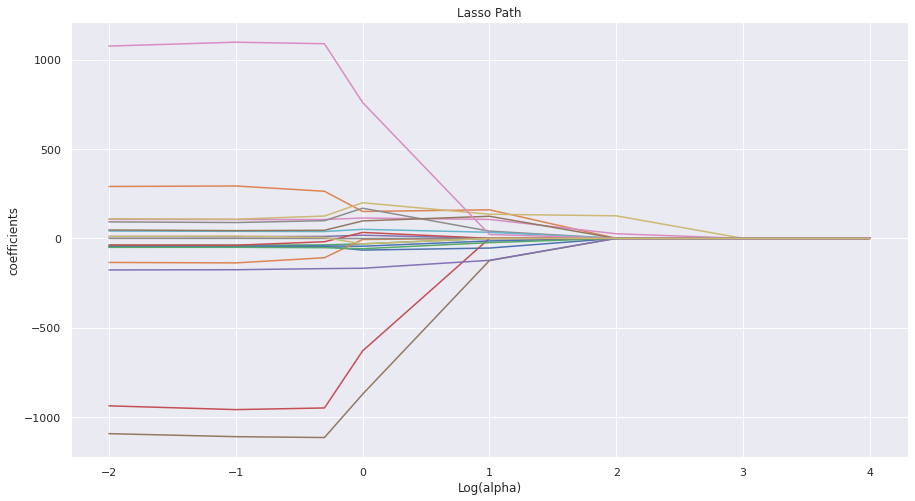

In [60]:
# Build lasso path to select alphas
X_train_standard = X_train/X_train.std(axis=0)
list_alphas = [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000]

alphas_lasso, coefs_lasso, _ = lasso_path(X_train_standard, Y_train.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
plt.figure(figsize=(15, 8))
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

In [61]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e5, normalize=True, alpha = 1)
lasso_model.fit(X=X_train, y=Y_train)
print(lasso_model.score(X_train, Y_train))

0.4139500395359915


In [62]:
lasso_model2 = sklearn.linear_model.Lasso(max_iter=10e5, normalize=True, alpha = 10)
lasso_model.fit(X=X_train, y=Y_train)
print(lasso_model.score(X_train, Y_train))

0.4139500395359915


According to the Lasso path chart, we could find that coefficients are relatively stable in values of 0 and 1 on the x-axis. So this study selected alpha of 1 and 10 as the target for the construction of the lasso model. The score was about 0.2074 when alpha was 10, which was much lower than the performance of alpha of 1. Therefore, alpha of 1 was chosen as the parameter for the lasso model.

In [63]:
coef_lasso = pd.DataFrame({"var": X_train.columns.values, "coef":lasso_model.coef_})
print(coef_lasso)

                                  var                                     coef
0                       Immigrant_10y                                  -0.0973
1                    high_certificate                                   0.1346
2                     African origins                                  -0.0000
3                       Asian origins                                  -0.0000
4                   Caribbean origins                                  -0.0000
5                    European origins                                  -0.0367
6                       Latin origins                                   1.3741
7                       Median income                                   0.0013
8                           Movers_1y                                   0.2875
9   North American Aboriginal origins                                   0.2036
10                    Oceania origins                                  -0.2143
11       Other North American origins               

In [64]:
var_lasso=list(coef_lasso[abs(coef_lasso["coef"])>=0.002]["var"])
print("The following variables would be selected as key variables")
print(var_lasso)

The following variables would be selected as key variables
['Immigrant_10y', 'high_certificate', 'European origins', 'Latin origins', 'Movers_1y', 'North American Aboriginal origins', 'Oceania origins', 'Land area', 'Population density', 'low income', 'Year']


When alpha=1, the coefficient of each variable were as shown above, the study selected variables with an absolute coefficient over 0.002 as key variables to build up a linear regression model.

In [65]:
# Linear regression model with training data
X_train_lasso=X_train.loc[:,var_lasso]
regressor_OLS = sm.OLS(endog=Y_train, exog=sm.add_constant(X_train_lasso)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     11.83
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.01e-15
Time:                        13:39:53   Log-Likelihood:                -1166.6
No. Observations:                 161   AIC:                             2357.
Df Residuals:                     149   BIC:                             2394.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              7748.3240   2.55e+04      0.304      0.762   -4.26e+04    5.81e+04
Immigrant_10y                        -0.4653      0.140     -3.322      0.001      -0.742      -0.189
high_certificate                      0.4294      0.099      4.352      0.000       0.234       0.624
European origins                     -0.2483      0.068     -3.670      0.000      -0.382      -0.115
Latin origins                         1.7309      0.652      2.655      0.009       0.442       3.019
Movers_1y                             0.4019      0.160      2.514      0.013       0.086       0.718
North American Aboriginal origins     0.7853      0.458      1.713      0.089      -0.121       1.691
Oceania origins                      -0.9479      1.195     -0.793      0.429      -3.309       1.413
Land area                           -62.8442     54.259     -1.158      0.249    -170.060      44.372
Population density                   -0.0238      0.006     -3.738      0.000      -0.036      -0.011
low income                           18.4187      6.258      2.943      0.004       6.053      30.785
Year                                 -3.9863     12.655     -0.315      0.753     -28.993      21.020
==============================================================================
Omnibus:                      211.394   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12240.609
Skew:                           5.198   Prob(JB):                         0.00
Kurtosis:                      44.432   Cond. No.                     1.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Linear regression model with training data
lr = LinearRegression()
lr.fit(X_train_lasso,Y_train)
print("The score of test data was "+str(lr.score(X_test.loc[:,var_lasso],Y_test)))

The score of test data was 0.4665988152420075


In [67]:
lr_lasso=["linear regression",lr.score(X_train_lasso,Y_train),lr.score(X_test.loc[:,var_lasso],Y_test)]

The r-square of the model from train data was 0.466 after filtering variables by lasso. The r-square was significantly improved compared to the VIF method, which showed that the choice of indicators was relatively justified. At the same time, the p-values of most of the variables were below 0.05, indicating that the variables showed a significant relationship with crime. On the other hand, R-square of the model tested by testing data was 0.466 which also had a better fit to the model. Compared with the train data, it showed relatively stability in the model.

In conclusion, the study would choose lasso model as the best method to build linear regression model since the r-square and independent variables had a better performance compared with VIF method.

## 5.4 Random forest model

### 5.4.1 Initial randomforest model

The study uses RandomForestRegressor() to build an initial random forest model to explore the performance without filtering the variables.

In [68]:
#  Build initial randomforset model
randomState_rf = 1
rf = RandomForestRegressor(n_estimators=100, random_state=randomState_rf)

In [69]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=1)

In [70]:
# check the score of train data
print("The score of train data was "+str(rf.score(X_train, Y_train)))

The score of train data was 0.8584198534485473


In [71]:
# check the score of test data
print("The score of test data was "+str(rf.score(X_test, Y_test)))

The score of test data was 0.46145990207338194


In [72]:
# check the difference between train and test data
Difference=rf.score(X_train, Y_train)-rf.score(X_test, Y_test)
print("The difference between train and test data was "+str(Difference))

The difference between train and test data was 0.3969599513751654


The  model above showed a high R-square in the train data (0.86), however, the R-square fluctuated widely in the test data (0.46), which had a difference of 0.4. This showed an over-fitting problem in the random forest model, so the study tried to improve its accuracy by selecting the key indicators.

### 5.4.2 Selection of significant variables based on RF model

By using .frature_importances_, the importance value of each variables could be shown as below.

In [73]:
# find signigicant variables based on the initital random forest model
importance = rf.feature_importances_
feature=X_train.columns
importance_level=pd.DataFrame({"columns":feature,"importance":importance})
importance_level=importance_level.sort_values("importance",ascending=False)
importance_level

,columns,importance
8,Movers_1y,0.2092
6,Latin origins,0.1938
9,North American Aboriginal origins,0.1181
1,high_certificate,0.1109
15,low income,0.0982
13,Median age,0.0609
16,Population,0.0475
18,Ethnicity,0.0376
14,Population density,0.0191
5,European origins,0.0150


In [74]:
# select significant variable with importance over 0.02
columns_rf=list(importance_level[importance_level["importance"]>=0.02]["columns"])
print("Significant variables were shown as below:")
print(columns_rf)

Significant variables were shown as below:
['Movers_1y', 'Latin origins', 'North American Aboriginal origins', 'high_certificate', 'low income', 'Median age', 'Population', 'Ethnicity']


In [75]:
# Rerun the random forest model by using significant variables
X_train_rf=X_train.loc[:,columns_rf]
rf.fit(X_train_rf,Y_train)

RandomForestRegressor(random_state=1)

In [76]:
# check the score of train data
print("The score of train data was "+str(rf.score(X_train_rf, Y_train)))

The score of train data was 0.8709468683589822


In [77]:
# check the score of test data
print("The score of test data was "+str(rf.score(X_test.loc[:,columns_rf],Y_test)))

The score of test data was 0.4935028310106012


In [78]:
# check the difference between train and test data
difference_rf=rf.score(X_train_rf, Y_train)-rf.score(X_test.loc[:,columns_rf],Y_test)
print("The difference between train and test data was "+str(difference_rf))

The difference between train and test data was 0.37744403734838095


In [79]:
rf_rf=["random forest",rf.score(X_train_rf, Y_train),rf.score(X_test.loc[:,columns_rf],Y_test)]

With R-square 0.87 in train data and 0.49 in test data. The adjustment of the indicators did not improve the model compared to the initial random forest model results. Therefore, the study would try to construct the model using the significant variables from the former lasso model to find a solution.

### 5.4.3 Selection of significant variables based on Lasso model

In [80]:
rf.fit(X_train_lasso,Y_train)

# check the score of train data
print("The score of train data was "+str(rf.score(X_train_lasso,Y_train)))

The score of train data was 0.8662731288645724


In [81]:
# check the score of test data
print("The score of test data was "+str(rf.score(X_test.loc[:,var_lasso],Y_test)))

The score of test data was 0.2703118838529843


In [82]:
# check the difference between train and test data
difference_lasso=rf.score(X_train_lasso,Y_train)-rf.score(X_test.loc[:,var_lasso],Y_test)
print("The difference between train and test data was "+str(difference_lasso))

The difference between train and test data was 0.5959612450115881


Unfortunately, the significant variables in the lasso model did not fit well in the random forest model, and worsened the results.

In conclusion,  the R-square of the training model was high but the R-square of the experimental model was generally low in the random forest model. The problem was not effectively solved by methods such as adjusting variables, so the model with significant variables filtered by the initial RF model would be selected as the final result.

## 5.5 Comparation of two models

In [83]:
# Build the comparation table
Compare=pd.DataFrame([lr_lasso,rf_rf], columns=["Model",'R2_train_data', 'R2_test_data'])
Compare['R2_diff']=Compare['R2_train_data']-Compare['R2_test_data']
Compare

,Model,R2_train_data,R2_test_data,R2_diff
0,linear regression,0.4662,0.4666,-0.0004
1,random forest,0.8709,0.4935,0.3774


According to the comparation table, although the random forest model had a highr score, the high difference between test data and train data showed the instability of the model. On the contrary, the linear regression model had a relatively low score, but the model is much more stable, so the linear regression model would be chosen as the final regression model in the study.

According to the results of the regression model, immigration, education, European origins, population density and income perform  less than 0.05 of p-values in the model, so the five variables would have a significant effect on the crime incident.

## 5.6 K-means clustering

The process of clustering could be shown as below:
- select significant variables and do the data normalization
- Calculate SSE and select the number of clusters
- K-means clustering

### 5.6.1 Data selection and normalization

The study would select 2016 census data to do the cluster analysis since the data can be used as a more scientific reference for future public security planning as the latest statistics data in the city of Vancouver. It could also avoid the problem of confusing area caused by different years in the same place.

In [84]:
# select 2016 census data with 5 significant variables
census_k=census[census["Year"]==2016].loc[:,['Immigrant_10y',
 'high_certificate',
 'European origins',
 'Population density',
 'low income']]


In [85]:
# Data normalization
rs = RobustScaler(quantile_range=(10.0, 90.0))
normed = census_k.copy()

# presentation of te data
for c in census_k.columns.values:
    normed[c] = rs.fit_transform(census_k[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of Immigrant_10y is [-0.5716353111432706, 1.7004341534008682]
The range of high_certificate is [-0.5903441682600382, 2.705544933078394]
The range of European origins is [-0.6018385521401896, 1.8715886239586326]
The range of Population density is [-0.3290113568956696, 1.9708740895151036]
The range of low income is [-0.6174698795180722, 3.900602409638554]


,Immigrant_10y,high_certificate,European origins,Population density,low income
CT_Name,,,,,
1.0100,-0.0579,-0.1099,0.1953,-0.0296,-0.3614
1.0200,0.0289,-0.0406,-0.1551,-0.2242,0.1130
2.0100,-0.1737,0.0167,-0.0632,-0.2098,-0.1506
2.0300,-0.1085,-0.3872,-0.5243,-0.0884,-0.0377
2.0400,0.0000,-0.2486,-0.2485,-0.0513,-0.2033


### 5.6.2 SSE calculation and K-means clustering

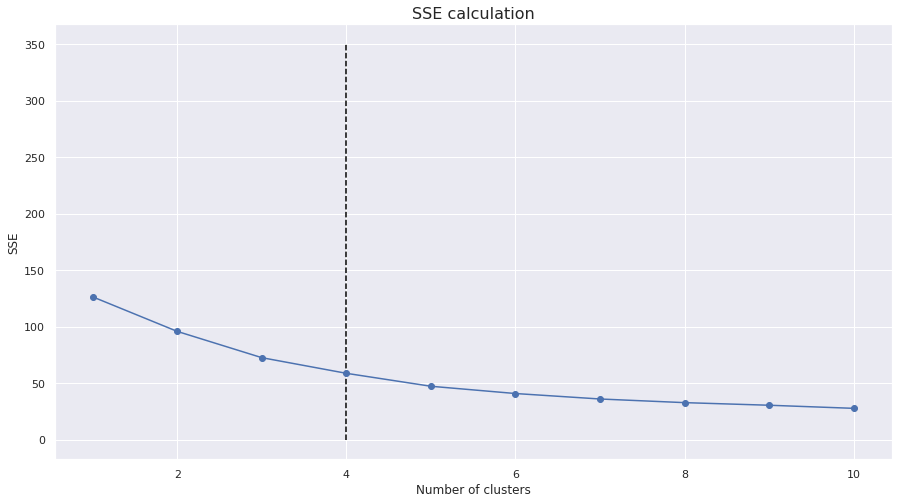

In [86]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    list_SSE.append(km.inertia_)

# plot the result of SSE
plt.figure(figsize=(15, 8))
plt.vlines(4,0, 350,color="black",linestyle="--")
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE calculation', fontsize=16)
plt.show()

As shown in the figure above, the slope was skewed as the number of clusters went from 0 to 4, showing that SSE value declined rapidly as the number of clusters rose. However, the slope became flat when the x axis started from 4. Therefore, the study would choose 4 clusters as the result of SSE analysis.

KMeans() was used to build clusters

In [87]:
k_cluster = 4
random_seed = 108
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

KMeans(n_clusters=4, random_state=108)

### 5.6.3 Visualization

The study chose a centroid graph to show the difference between each cluster and a map to find the specific location that needs to concentrate on.

In [88]:
# Code reference: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

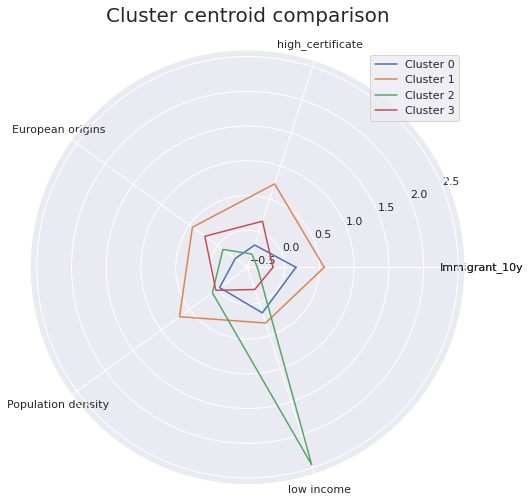

In [89]:
# Plot the centroid graph to show data
df_cluster_centroid = pd.DataFrame(kmeans_method.cluster_centers_, columns=normed.columns)
radar_plot_cluster_centroids(df_cluster_centroid)

In [90]:
k_means=normed
k_means["k"]=kmeans_method.labels_
k_means["k"]=k_means["k"].astype("object")
k_means.head()

,Immigrant_10y,high_certificate,European origins,Population density,low income,k
CT_Name,,,,,,
1.0100,-0.0579,-0.1099,0.1953,-0.0296,-0.3614,3
1.0200,0.0289,-0.0406,-0.1551,-0.2242,0.1130,0
2.0100,-0.1737,0.0167,-0.0632,-0.2098,-0.1506,3
2.0300,-0.1085,-0.3872,-0.5243,-0.0884,-0.0377,0
2.0400,0.0000,-0.2486,-0.2485,-0.0513,-0.2033,0


In [91]:
#  merging the map from city of Vancouver and the result of cluster
districts["CTNAME"]=districts["CTNAME"].astype("float")
districts_index=districts.sort_values("CTNAME").set_index("CTNAME")
k_census=districts_index.join(k_means)
k_census.head()

,CTUID,CMANAME,geometry,Immigrant_10y,high_certificate,European origins,Population density,low income,k
CTNAME,,,,,,,,,
1.0100,9330001.01,Vancouver,"MULTIPOLYGON (((4021360.706 1997086.311, 40212...",-0.0579,-0.1099,0.1953,-0.0296,-0.3614,3
1.0200,9330001.02,Vancouver,"MULTIPOLYGON (((4020999.057 1997029.334, 40209...",0.0289,-0.0406,-0.1551,-0.2242,0.1130,0
2.0100,9330002.01,Vancouver,"MULTIPOLYGON (((4020551.206 1998307.671, 40205...",-0.1737,0.0167,-0.0632,-0.2098,-0.1506,3
2.0300,9330002.03,Vancouver,"MULTIPOLYGON (((4019062.086 1998301.406, 40190...",-0.1085,-0.3872,-0.5243,-0.0884,-0.0377,0
2.0400,9330002.04,Vancouver,"MULTIPOLYGON (((4019016.357 1998265.420, 40190...",0.0000,-0.2486,-0.2485,-0.0513,-0.2033,0


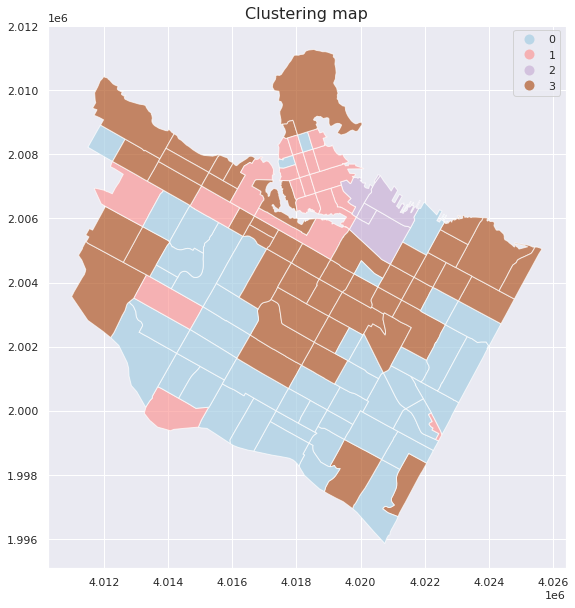

In [92]:
k_census.plot("k",linewidth=1, zorder=1,figsize=(15, 10), categorical=True,legend=True,cmap='Paired',edgecolors="white",alpha=0.7)
plt.title('Clustering map', fontsize=16)
plt.show()

The cluster centroid comparison showed the difference between 4 clusters. According to the figure, with the highest low income value and lowest education status, cluster 2 should be concentrated in the future. Besides, with a high population density, a high level of immigration and a diverse ethnicity area, Cluster 1 was a conflicted area. At the same time, there were also a large number of low-income groups, making it an area full of conflict in the city of Vancouver. Therefore, the cluster also needs further attention in the future.

The map above showed that both Cluster 1 and Cluster 2 were located at the fringe area of the city. The security management may have problems such as weak management of the peripheral areas. Therefore, security management needs to be strengthened in these areas.

# 6 Discussion

## 6.1 Selection of indicators based on ethnicity and immigration

The selection of indicators for the study was based on two components, individual and community. On one hand, the basic indicators of population, income and education would determine the socio-economic status of the area in the individual component. It could undoubtedly have an impact on the crime rate of the area. 

On the other hand, different communities like single ethnic dominated community and diverse ethnic community might have different results to the frequency of conflict incidents separately, so the indicator of ethnic heterogeneity must be taken into account. Besides, individual ethnic groups are also an important factor to consider because of historical or economic reasons, so population from each ethnic group would be considered as indicators in the research. Mobility and immigration generated by different countries would have different internal impacts on the community, so these two indicators would be considered separately.

## 6.2 Selection of model based on stability

In terms of the selection of regression model, linear regression, with relatively lower R-square in test data regression but similar R2 in training and test data was selected in the study. On the contrary, although the random forest model fit better in the training data, R-square significantly varied between training data and test data. The high bias would also exist after selecting indicators through the initial Random forest model. This would prove that the random forest model is unstable and have an overfitting problem, the reason for which may be the less of training data. Due to the difficulty of demographics in the city of Vancouver, the lack of statistical data for each year could not allow for a better model analysis in random forest. 

## 6.3 Limitation of cause exploration

Although indicators that had a significant impact on crime were identified in the regression model, the reason why some of these indicators had an impact on the dependent variable still needs to be further explored. For example, European origins, treated as an indicator of ethnicity, may influence crime. However, it remains unclear whether they would influence crime because of community instability from conflict or being harmed because of criminal incidents. It also needs us to explore more clues in the crime data.

# 7 Conclusion

The study used lasso and linear regression model to find relationship between multiple indicators, including immigration and ethnicity, and crime. Besides, by selecting significant indicators, the study also clusters public security areas that should be concentrated by k-means clustering, which can provide controlling crime ideas from a diverse perspective in Vancouver.

# Reference

Andresen, M.A., 2006. A spatial analysis of crime in Vancouver, British Columbia: a synthesis of social disorganization and routine activity theory. The Canadian Geographer / Le Géographe canadien 50, 487–502. https://doi.org/10.1111/j.1541-0064.2006.00159.x

Andresen, M.A., Hodgkinson, T., 2018. Predicting Property Crime Risk: an Application of Risk Terrain Modeling in Vancouver, Canada. Eur J Crim Policy Res 24, 373–392. https://doi.org/10.1007/s10610-018-9386-1

Campbell, H.E., Kim, Y., Eckerd, A., 2014. Local Zoning and Environmental Justice: An Agent-Based Model Analysis. Urban Affairs Review 50, 521–552. https://doi.org/10.1177/1078087413505736

Chon, D.S., 2012. The Impact of Population Heterogeneity and Income Inequality on Homicide Rates: A Cross-National Assessment. Int J Offender Ther Comp Criminol 56, 730–748. https://doi.org/10.1177/0306624X11414813

Cole, J.H., Gramajo, A.M., 2009. Homicide Rates in a Cross-Section of Countries: Evidence and Interpretations. Population and Development Review 35, 749–776. https://doi.org/10.1111/j.1728-4457.2009.00307.x

Hiebert, D., 2009. The economic integration of immigrants in Metropolitan Vancouver.

Sampson, R.J., Raudenbush, S.W., Earls, F., 1997. Neighborhoods and Violent Crime: A Multilevel Study of Collective Efficacy. Science. https://doi.org/10.1126/science.277.5328.918

Unnever, J.D., 2019. Ethnicity and Crime in the Netherlands. International Criminal Justice Review 29, 187–204. https://doi.org/10.1177/1057567717752218

Wang, L., Lee, G., Williams, I., 2019. The Spatial and Social Patterning of Property and Violent Crime in Toronto Neighbourhoods: A Spatial-Quantitative Approach. ISPRS International Journal of Geo-Information 8, 51. https://doi.org/10.3390/ijgi8010051

(2871 words)